In [1]:
import pandas as pd
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from scipy.stats import ttest_rel
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import linregress
from sklearn.model_selection import GridSearchCV
from scipy.stats import ttest_ind, linregress
import statsmodels.api as sm
from scipy.stats import wilcoxon
from scipy.stats import shapiro

# Table of Contents
- [Section 1: Introduction](#Introduction)
- [Section 2: Processing - Analysis](#Processing-Analysis)
- [Section 3: Modeling](#Modeling)
    - [Section 3.1: Linear Regression](#Linear-Regression)
    - [Section 3.2: Decision Tree Regression](#Decision-Tree-Regression)
    - [Section 3.3: Random Forest Regression](#Random-Forest-Regression)
- [Section 4: Hypothesis tests](#Hypothesis-tests)

# How can we predict the number of future sales of electric vehicles in Germany?

## Introduction

### Objective
Germany is home to some of the world's largest and most influential automotive manufacturers, including Volkswagen, BMW and Mercedes-Benz. These companies are heavily investing in electric vehicles and shaping the EV market. The primary objective of this project is to develop a predictive model that can estimate the number of future sales of electric vehicles in Germany. This model leverages various independent variables that influence EV sales, such as the existing stock of EVs, the number of available charging stations or average fuel prices. Can we accurately predict the number of future ev sales? How do changes in average fuel prices affect the number of electric vehicle sales in Germany? Is there a statistically significant correlation between rising fuel prices and increased adoption of electric vehicles? What is the relationship between CO2 emissions by transport and the adoption of electric vehicles in Germany?

### Hypotheses
To complement the predictive model, two hypotheses are included in this study. The first hypothesis is that an increase in average fuel prices results in a significant increase in predicted EV sales. The rationale behind this hypothesis is that rising fuel prices make traditional internal combustion engine vehicles less attractive, incentivizing consumers to transition to EVs as a cost-effective alternative. The second hypothesis is that a decrease in CO2 emissions by the transportation sector results in increase in predicted EV sales.

### Methodology
The data was collected from various sources. These involve existing data sets and extractions from text data / sources. This is followed by the preprocessing and data analysis phases, in which we take a closer look at the collected data. The machine learning phase will involve training suitable models and evaluating their performance to determine the best-performing model. This model will then be used to make predictions for testing the hypotheses.
Following this, hypothesis testing will be conducted to evaluate whether the null hypotheses can be rejected.

## Processing-Analysis

As mentioned in the introduction, the data was collected from various sources involving existing data sets and extractions from text data/sources like articles or papers. The focus here was of course on certain features/variables that could have an impact on sales figures.

### GDP growth
GDP growth serves as an indicator of a country's overall economic health and purchasing power. In the context of Germany, higher GDP growth suggests increased consumer confidence, which can lead to a higher demand for electric vehicles as consumers are more likely to invest in environmentally friendly and innovative transportation options. Additionally, GDP growth may correlate with government investments in EV infrastructure, further supporting EV adoption. https://www.macrotrends.net/global-metrics/countries/DEU/germany/gdp-growth-rate

In [2]:
# GDP growth
gdp_growth_data = {
    "Year": [
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "GDP Growth (%)": [
        4.18, 3.39, 0.42, 0.44, 2.21, 1.49, 2.23, 2.68, 
        0.98, 1.08, -3.83, 3.16, 1.81, -0.3
    ]
}

gdp_growth_df = pd.DataFrame(gdp_growth_data)
gdp_growth_df

,Year,GDP Growth (%)
0,2010,4.18
1,2011,3.39
2,2012,0.42
3,2013,0.44
4,2014,2.21
5,2015,1.49
6,2016,2.23
7,2017,2.68
8,2018,0.98
9,2019,1.08


### Disposable Income
Disposable income represents the amount of money households have available for spending and saving after taxes. Higher disposable income can directly influence the ability of consumers to afford electric vehicles, which are often perceived as premium products. With increased disposable income, individuals are more likely to invest in sustainable transportation solutions, thereby boosting EV sales. https://www.destatis.de/EN/Themes/Economy/National-Accounts-Domestic-Product/Tables/lrvgr04.html#242560

In [3]:
disposable_income_data = {
    "Year": [
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "Disposable Income (EUR bn)": [
        2117.96, 2251.78, 2280.52, 2324.41, 2425.05, 2515.47, 2616.92, 2716.89, 
        2822.64, 2919.45, 2791.17, 3000.26, 3182.85, 3386.03
    ]
}

disposable_income_df = pd.DataFrame(disposable_income_data)
disposable_income_df

,Year,Disposable Income (EUR bn)
0,2010,2117.96
1,2011,2251.78
2,2012,2280.52
3,2013,2324.41
4,2014,2425.05
5,2015,2515.47
6,2016,2616.92
7,2017,2716.89
8,2018,2822.64
9,2019,2919.45


### Inflation Rate
The inflation rate reflects the rate at which prices for goods and services rise over a specific period. A higher inflation rate can negatively impact EV sales by reducing consumers' purchasing power, making electric vehicles less affordable. Conversely, a stable or low inflation rate fosters economic stability, allowing consumers to consider long-term investments like EVs. Moreover, inflation can influence the cost of EV production and pricing, potentially affecting demand. https://www.statista.com/statistics/375207/inflation-rate-in-germany/

In [4]:
inflation_rate_data = {
    "Year": [
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "Inflation Rate (%)": [
        1.12, 2.48, 2.16, 1.61, 0.77, 0.68, 0.37, 1.7, 
        1.94, 1.35, 0.37, 3.21, 8.67, 6.03
    ]
}

inflation_rate_df = pd.DataFrame(inflation_rate_data)
inflation_rate_df

,Year,Inflation Rate (%)
0,2010,1.12
1,2011,2.48
2,2012,2.16
3,2013,1.61
4,2014,0.77
5,2015,0.68
6,2016,0.37
7,2017,1.70
8,2018,1.94
9,2019,1.35


### Electricity Consumption
Electricity consumption measures the total energy usage within a country, reflecting trends in energy dependency and infrastructure. In Germany, higher electricity consumption can indicate an increased reliance on electric-powered solutions, including electric vehicles. This feature helps predict EV sales by providing insights into the readiness of the power grid and the public's familiarity with electricity-based technologies. https://www.statista.com/statistics/383650/consumption-of-electricity-in-germany/

In [5]:
electricity_consumption_data = {
    "Year": [
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022
    ],
    "Electricity Consumption (TWh)": [
        565.66, 557.89, 556.13, 555.04, 542.61, 547.76, 550.61, 551.94, 
        541.74, 527.24, 504.38, 521.79, 507.25
    ]
}

electricity_consumption_df = pd.DataFrame(electricity_consumption_data)
electricity_consumption_df

,Year,Electricity Consumption (TWh)
0,2010,565.66
1,2011,557.89
2,2012,556.13
3,2013,555.04
4,2014,542.61
5,2015,547.76
6,2016,550.61
7,2017,551.94
8,2018,541.74
9,2019,527.24


### Urbanization Rate
The urbanization rate represents the proportion of a population living in urban areas. In Germany, a higher urbanization rate can positively influence EV sales as urban residents often have better access to charging infrastructure and shorter commuting distances, making EVs more practical and appealing. https://www.statista.com/statistics/455825/urbanization-in-germany/#:~:text=Urbanization%20means%20the%20share%20of,in%20urban%20areas%20and%20cities.&text=Currently%2C%20about%20three%20quarter%20of,most%20nations%20around%20the%20world

In [6]:
urbanization_rate_data = {
    "Year": [
        2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "Urbanization Rate (%)": [
        77.18, 77.19, 77.2, 77.22, 77.26, 77.31, 77.38, 77.45, 
        77.54, 77.65, 77.77
    ]
}

urbanization_rate_df = pd.DataFrame(urbanization_rate_data)
urbanization_rate_df

,Year,Urbanization Rate (%)
0,2013,77.18
1,2014,77.19
2,2015,77.20
3,2016,77.22
4,2017,77.26
5,2018,77.31
6,2019,77.38
7,2020,77.45
8,2021,77.54
9,2022,77.65


### Fuel Prices
Fuel prices are a critical economic factor influencing consumer decisions between traditional internal combustion engine vehicles and electric vehicles. In Germany, rising fuel prices make conventional vehicles less cost-effective, prompting consumers to consider EVs as a more economical alternative over the long term. High fuel prices also highlight the cost advantages of EVs in terms of lower operating and maintenance costs, thereby boosting their attractiveness. https://autotraveler.ru/en/germany/trend-price-fuel-germany.html

In [7]:
lpg_fuel_data = {
    "Year": [
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "LPG_price (€)": [
        0.7575, 0.7957, 0.764, 0.7221, 0.6067, 0.5506, 0.582, 0.6175, 
        0.6124, 0.633, 0.7178, 1.039, 1.0673
    ]
}

lpg_fuel_data_df = pd.DataFrame(lpg_fuel_data)
lpg_fuel_data_df

,Year,LPG_price (€)
0,2011,0.7575
1,2012,0.7957
2,2013,0.7640
3,2014,0.7221
4,2015,0.6067
5,2016,0.5506
6,2017,0.5820
7,2018,0.6175
8,2019,0.6124
9,2020,0.6330


In [8]:
b7_fuel_data = {
    "Year": [
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "B7_price (€)": [
        1.418, 1.4777, 1.4066, 1.3644, 1.1899, 1.1112, 1.1592, 1.2715, 
        1.263, 1.137, 1.384, 1.9852, 1.744
    ]
}

b7_fuel_data_df = pd.DataFrame(b7_fuel_data)
b7_fuel_data_df

,Year,B7_price (€)
0,2011,1.4180
1,2012,1.4777
2,2013,1.4066
3,2014,1.3644
4,2015,1.1899
5,2016,1.1112
6,2017,1.1592
7,2018,1.2715
8,2019,1.2630
9,2020,1.1370


In [9]:
e5_fuel_data = {
    "Year": [
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "E5_price (€)": [
        1.6078, 1.69792, 1.6332, 1.6055, 1.477375, 1.403, 1.4908, 1.5854, 
        1.572, 1.463, 1.7601, 2.01136, 1.942
    ]
}

e5_fuel_data_df = pd.DataFrame(e5_fuel_data)
e5_fuel_data_df

,Year,E5_price (€)
0,2011,1.607800
1,2012,1.697920
2,2013,1.633200
3,2014,1.605500
4,2015,1.477375
5,2016,1.403000
6,2017,1.490800
7,2018,1.585400
8,2019,1.572000
9,2020,1.463000


In [10]:
e10_fuel_data = {
    "Year": [
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "E10_price (€)": [
        1.523, 1.5823, 1.5549, 1.532, 1.395, 1.29796, 1.37064, 1.4302, 
        1.4403, 1.303, 1.5864, 1.9789, 1.865
    ]
}

e10_fuel_data_df = pd.DataFrame(e10_fuel_data)
e10_fuel_data_df

,Year,E10_price (€)
0,2011,1.52300
1,2012,1.58230
2,2013,1.55490
3,2014,1.53200
4,2015,1.39500
5,2016,1.29796
6,2017,1.37064
7,2018,1.43020
8,2019,1.44030
9,2020,1.30300


In [11]:
# Merging all dataframes on the 'Year' column
merged_df = e10_fuel_data_df.merge(e5_fuel_data_df, on='Year').merge(b7_fuel_data_df, on='Year').merge(lpg_fuel_data_df, on='Year')

# Calculating the average fuel price for each year
merged_df['average_fuel_price'] = merged_df[['E10_price (€)', 'E5_price (€)', 'B7_price (€)', 'LPG_price (€)']].mean(axis=1)

# Selecting only the required columns
average_fuel_price_df = merged_df[['Year', 'average_fuel_price']]

In [12]:
average_fuel_price_df

,Year,average_fuel_price
0,2011,1.326575
1,2012,1.388405
2,2013,1.339675
3,2014,1.306000
4,2015,1.167244
5,2016,1.090690
6,2017,1.150660
7,2018,1.226150
8,2019,1.221925
9,2020,1.134000


### Registrations
The number of EV registrations serves as a direct indicator of the current adoption rate of electric vehicles in Germany. This feature reflects market trends and consumer behavior, providing insights into how rapidly the EV market is growing. A higher number of registrations signals increasing acceptance and trust in EV technology, which can encourage further adoption. https://www.statista.com/statistics/1166572/new-electric-car-registrations-number-germany/

In [13]:
registrations_data = {
    "Year": [
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "Registrations": [
        541, 2154, 2956, 6051, 8522, 12363, 11410, 
        25056, 36062, 63281, 194163, 355961, 470559, 524219
    ]
}

registrations_data_df = pd.DataFrame(registrations_data)
registrations_data_df

,Year,Registrations
0,2010,541
1,2011,2154
2,2012,2956
3,2013,6051
4,2014,8522
5,2015,12363
6,2016,11410
7,2017,25056
8,2018,36062
9,2019,63281


### CO2 emission by transport
CO2 emissions from the transport sector indicate the environmental impact of conventional vehicles and the urgency for transitioning to cleaner alternatives like electric vehicles. In Germany, high CO2 emissions can drive policy changes, such as stricter emissions regulations and incentives for EV adoption, encouraging consumers to switch to electric vehicles. https://www.iea.org/countries/germany/emissions

In [14]:
# Loading the dataset to understand its structure and columns
file_path = 'International Energy Agency - CO2 emissions by sector in Germany.csv'
co2_emissions = pd.read_csv(file_path)

# Filtering the dataset for rows where "CO2 emissions by sector in Germany" is "Transport"
transport_emissions = co2_emissions[co2_emissions['CO2 emissions by sector in Germany'] == "Transport"]

# Filtering for rows where the year is 2010 or later
transport_emissions_2010_onwards = transport_emissions[transport_emissions['Year'] >= 2010]
transport_emissions_2010_onwards
transport_emissions_2010_onwards = transport_emissions_2010_onwards.drop(columns=["CO2 emissions by sector in Germany", "Units"])

# Renaming the column "Value" to "Mt CO2"
transport_emissions_2010_onwards.rename(columns={"Value": "Mt CO2"}, inplace=True)
transport_emissions_2010_onwards = transport_emissions_2010_onwards.reset_index(drop=True)

# Reordering columns so that "Year" comes first and "Mt CO2" comes second
transport_emissions_2010_onwards = transport_emissions_2010_onwards[["Year", "Mt CO2"]]

transport_emissions_2010_onwards

,Year,Mt CO2
0,2010,148.123
1,2011,149.942
2,2012,148.513
3,2013,152.366
4,2014,154.573
5,2015,157.590
6,2016,161.024
7,2017,163.491
8,2018,157.660
9,2019,160.038


### EV Sales
EV sales represent the primary outcome the model aims to predict. This variable reflects the total number of electric vehicles sold in every year. https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [15]:
file_path = 'IEA-EV-dataEV salesHistoricalCars.csv'
data = pd.read_csv(file_path)

data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In this dataset values from different countries were included. We filter for "Germany" of course. This dataset is specifcally about electrical cars. There are also dataset for trucks, vans and buses. We conduct the same process for each of them.

In [16]:
# Filtering rows where region is 'Germany' and parameter is 'EV sales'
germany_ev_sales_cars = data[(data['region'] == 'Germany') & (data['parameter'] == 'EV sales')]

# Grouping by year and calculate the sum of 'value'
germany_ev_sales_cars_sum = germany_ev_sales_cars.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_sales_cars_sum_df = germany_ev_sales_cars_sum.reset_index()
germany_ev_sales_cars_sum_df.columns = ['Year', 'Total EV Sales']
germany_ev_sales_cars_sum_df

,Year,Total EV Sales
0,2010,156.0
1,2011,1678.0
2,2012,3429.0
3,2013,6823.0
4,2014,13508.0
5,2015,23063.0
6,2016,24000.0
7,2017,54082.0
8,2018,67110.0
9,2019,108200.0


In [17]:
file_path_buses = 'IEA-EV-dataEV salesHistoricalBuses.csv'
data_buses = pd.read_csv(file_path_buses)

data_buses.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3.000
1,Belgium,Historical,EV stock share,Buses,EV,2010,percent,0.019
2,Belgium,Historical,EV stock share,Buses,EV,2011,percent,0.019
3,Belgium,Historical,EV stock,Buses,BEV,2011,Vehicles,3.000
4,Belgium,Historical,EV stock,Buses,BEV,2012,Vehicles,3.000


In [18]:
# Filtering rows where region is 'Germany' and parameter is 'EV sales'
germany_ev_sales_buses = data_buses[(data_buses['region'] == 'Germany') & (data_buses['parameter'] == 'EV sales')]

# Grouping by year and calculate the sum of 'value'
germany_ev_sales_buses_sum = germany_ev_sales_buses.groupby('year')['value'].sum()

# Converting the result to a DataFram
germany_ev_sales_buses_sum_df = germany_ev_sales_buses_sum.reset_index()
germany_ev_sales_buses_sum_df.columns = ['Year', 'Total EV Sales']
germany_ev_sales_buses_sum_df

,Year,Total EV Sales
0,2016,246.0
1,2017,37.0
2,2018,43.0
3,2019,190.0
4,2020,428.0
5,2021,648.0
6,2022,666.0
7,2023,888.0


In [19]:
file_path_trucks = 'IEA-EV-dataEV salesHistoricalTrucks.csv'
data_trucks = pd.read_csv(file_path_trucks)

data_trucks.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV stock,Trucks,BEV,2010,Vehicles,2.0000
1,Belgium,Historical,EV stock share,Trucks,EV,2010,percent,0.0013
2,Belgium,Historical,EV stock share,Trucks,EV,2011,percent,0.0040
3,Belgium,Historical,EV stock,Trucks,BEV,2011,Vehicles,6.0000
4,Belgium,Historical,EV sales share,Trucks,EV,2011,percent,0.0098


In [20]:
# Filtering rows where region is 'Germany' and parameter is 'EV sales'
germany_ev_sales_trucks = data_trucks[(data_trucks['region'] == 'Germany') & (data_trucks['parameter'] == 'EV sales')]

# Grouping by year and calculate the sum of 'value'
germany_ev_sales_trucks_sum = germany_ev_sales_trucks.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_sales_trucks_sum_df = germany_ev_sales_trucks_sum.reset_index()
germany_ev_sales_trucks_sum_df.columns = ['Year', 'Total EV Sales']
germany_ev_sales_trucks_sum_df

,Year,Total EV Sales
0,2018,280.0
1,2019,620.0
2,2020,860.0
3,2021,1000.0
4,2022,1100.0
5,2023,2212.0


In [21]:
file_path_vans = 'IEA-EV-dataEV salesHistoricalVans.csv'
data_vans = pd.read_csv(file_path_vans)

data_vans.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7.000
1,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62.000
2,Belgium,Historical,EV sales share,Vans,EV,2010,percent,0.013
3,Belgium,Historical,EV stock share,Vans,EV,2010,percent,0.011
4,Belgium,Historical,EV stock share,Vans,EV,2011,percent,0.013


In [22]:
# Filtering rows where region is 'Germany' and parameter is 'EV sales'
germany_ev_sales_vans = data_vans[(data_vans['region'] == 'Germany') & (data_vans['parameter'] == 'EV sales')]

# Grouping by year and calculate the sum of 'value'
germany_ev_sales_vans_sum = germany_ev_sales_vans.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_sales_vans_sum_df = germany_ev_sales_vans_sum.reset_index()
germany_ev_sales_vans_sum_df.columns = ['Year', 'Total EV Sales']
germany_ev_sales_vans_sum_df

,Year,Total EV Sales
0,2010,172.0
1,2011,280.0
2,2012,950.0
3,2013,602.0
4,2014,720.0
5,2015,1002.0
6,2016,2400.0
7,2017,4500.0
8,2018,6000.0
9,2019,6700.0


Then we combine every computed dataframe to get the total ev sales in this case.

In [23]:
# Combining all four DataFrames and sum up 'Total EV Sales' for each year
all_ev_sales = pd.concat([
    germany_ev_sales_cars_sum_df,
    germany_ev_sales_buses_sum_df,
    germany_ev_sales_trucks_sum_df,
    germany_ev_sales_vans_sum_df
])

# Grouping by year and calculate the total EV sales
total_ev_sales_all = all_ev_sales.groupby('Year')['Total EV Sales'].sum().reset_index()
total_ev_sales_all

,Year,Total EV Sales
0,2010,328.0
1,2011,1958.0
2,2012,4379.0
3,2013,7425.0
4,2014,14228.0
5,2015,24065.0
6,2016,26646.0
7,2017,58619.0
8,2018,73433.0
9,2019,115710.0


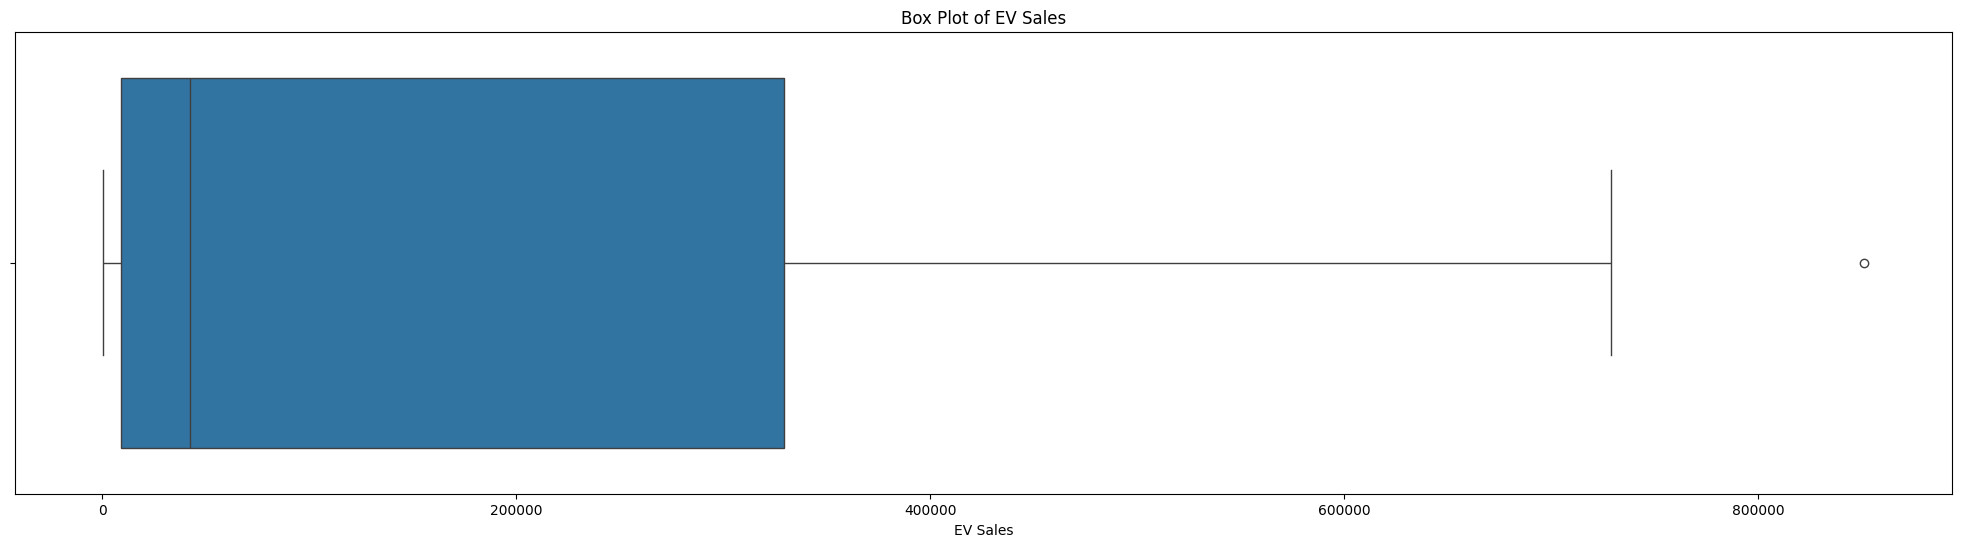

In [24]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=total_ev_sales_all, x='Total EV Sales')
plt.title('Box Plot of EV Sales')
plt.xlabel('EV Sales')
plt.show()

In [25]:
# Calculating measures of central tendency
mean_ev_sales = total_ev_sales_all["Total EV Sales"].mean()
median_ev_sales = total_ev_sales_all["Total EV Sales"].median()

# Preparing the results
central_tendency_measures = {
    "Mean": mean_ev_sales,
    "Median": median_ev_sales,
}

central_tendency_measures

{'Mean': np.float64(215201.85714285713), 'Median': np.float64(42632.5)}

The large discrepancy between the mean and the median implies that the growth in EV sales has been non-linear, with significant increases in recent years skewing the mean upward. 

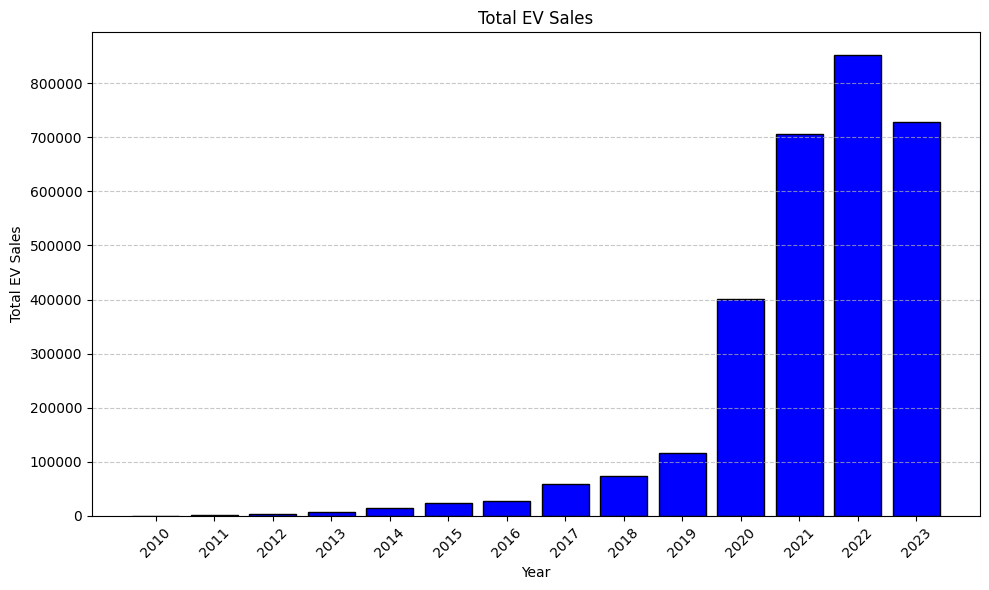

In [26]:
# Plotting the histogram for EV sales
plt.figure(figsize=(10, 6))
plt.bar(total_ev_sales_all["Year"], total_ev_sales_all["Total EV Sales"], color="blue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.title("Total EV Sales")
plt.xticks(total_ev_sales_all["Year"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
variance_ev_sales = total_ev_sales_all['Total EV Sales'].var()
variance_ev_sales

np.float64(99181660199.51646)

In [28]:
std_ev_sales = total_ev_sales_all['Total EV Sales'].std()
std_ev_sales

np.float64(314931.1991523172)

In [29]:
q1 = total_ev_sales_all['Total EV Sales'].quantile(0.25)
q3 = total_ev_sales_all['Total EV Sales'].quantile(0.75)
iqr_ev_sales = q3 - q1
iqr_ev_sales

np.float64(320152.75)

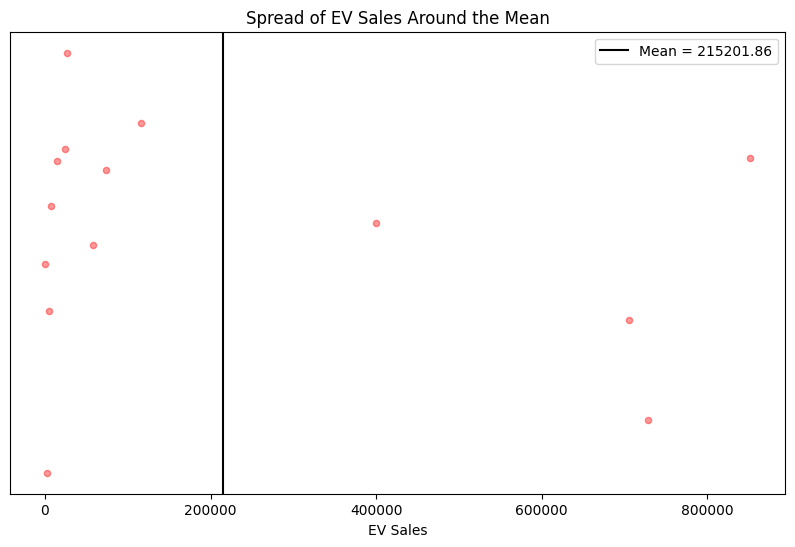

In [30]:
mean_ev_sales = total_ev_sales_all['Total EV Sales'].mean()
plt.figure(figsize=(10, 6))
plt.axvline(mean_ev_sales, color='black', linestyle='-', linewidth=1.5, label=f'Mean = {mean_ev_sales:.2f}')
# Jitter the y-position slightly for better visualization
y_jitter = np.random.normal(0, 0.1, size=len(total_ev_sales_all['Total EV Sales']))
plt.scatter(total_ev_sales_all['Total EV Sales'], y_jitter, color='red', alpha=0.4, s=20)
plt.yticks([])
plt.title('Spread of EV Sales Around the Mean')
plt.xlabel('EV Sales')
plt.legend()
plt.show()

The large variance, high standard deviation and significant IQR collectively indicate that EV sales in Germany have not been stable over the years. Instead, they have was a rapid growth in adoption and market penetration, particularly in recent years.

### Charging points
The number of charging points represents the availability of public and private charging infrastructure for electric vehicles. In Germany, the accessibility and density of charging stations are critical factors influencing consumer confidence and convenience in adopting EVs. https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [31]:
charging_points_data = {
    "Year": [
        2012, 2013, 2014, 2015, 2016, 2017, 
        2018, 2019, 2020, 2021, 2022, 2023
    ],
    "Charging_Points": [
        1518, 2447, 2726, 5070, 6430, 10800, 
        19500, 29900, 43000, 59300, 86000, 108000
    ]
}

charging_points_df = pd.DataFrame(charging_points_data)
charging_points_df

,Year,Charging_Points
0,2012,1518
1,2013,2447
2,2014,2726
3,2015,5070
4,2016,6430
5,2017,10800
6,2018,19500
7,2019,29900
8,2020,43000
9,2021,59300


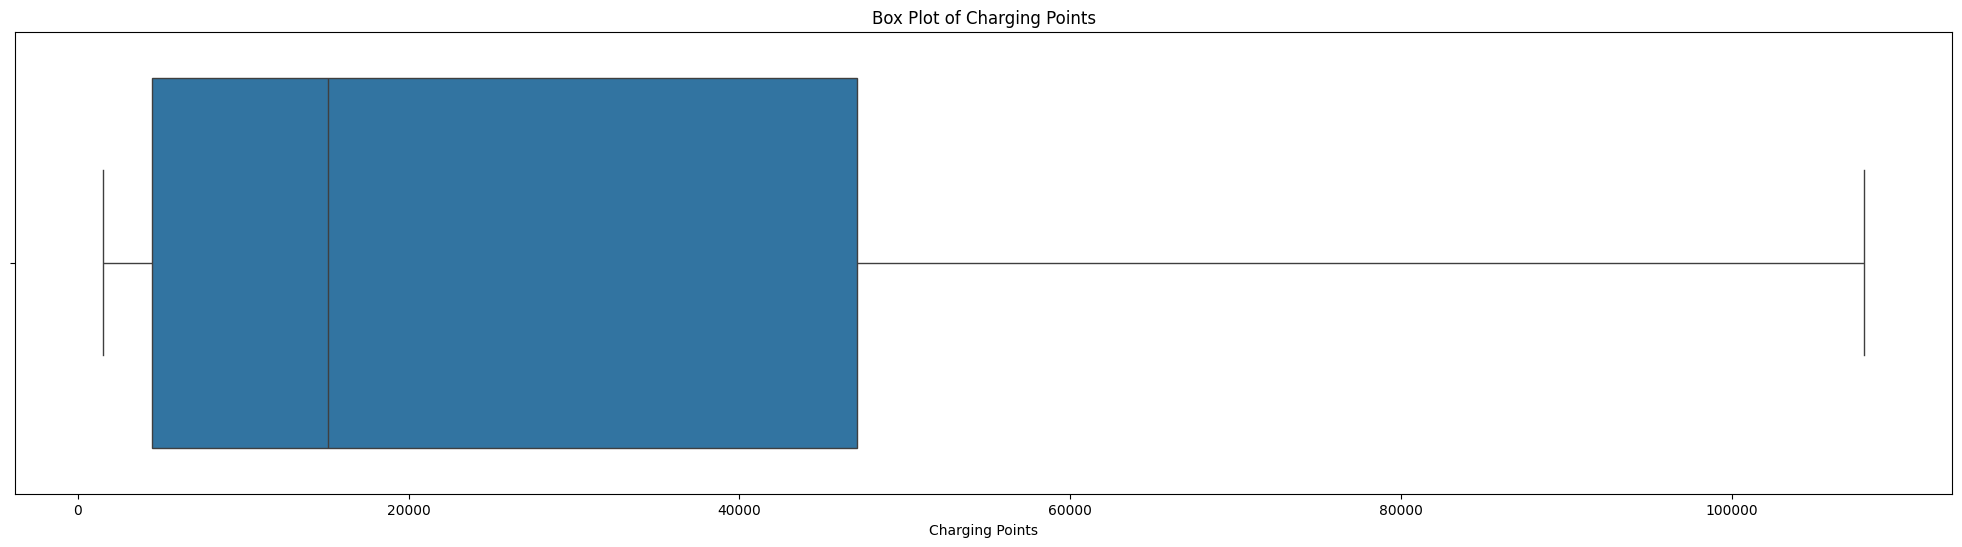

In [32]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=charging_points_df, x='Charging_Points')
plt.title('Box Plot of Charging Points')
plt.xlabel('Charging Points')
plt.show()

In [33]:
# Calculating measures of central tendency
mean_charging_points = charging_points_df["Charging_Points"].mean()
median_charging_points = charging_points_df["Charging_Points"].median()

# Preparing the results
central_tendency_charging_points = {
    "Mean": mean_charging_points,
    "Median": median_charging_points,
}

central_tendency_charging_points

{'Mean': np.float64(31224.25), 'Median': np.float64(15150.0)}

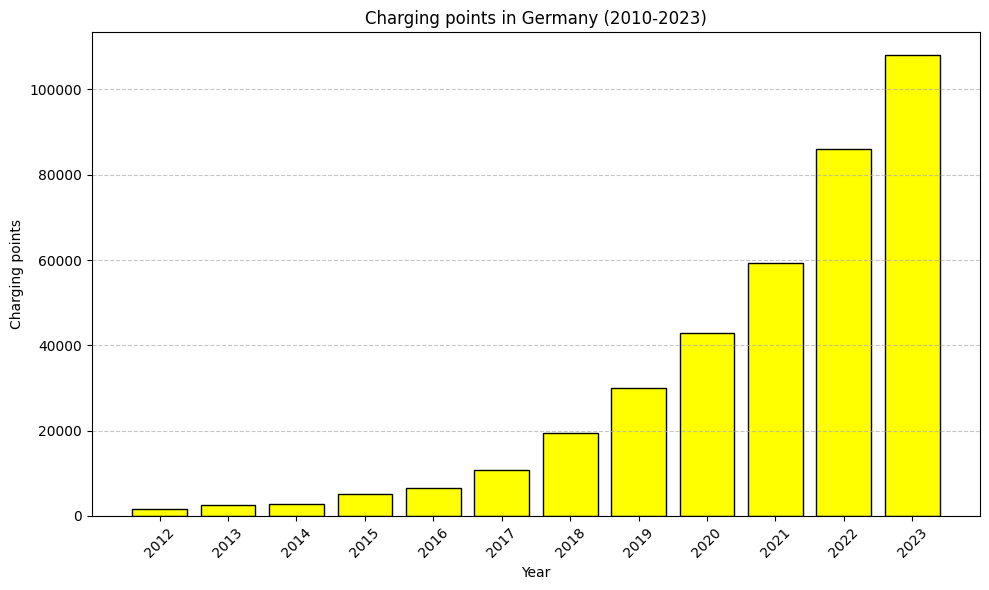

In [34]:
# Plotting the histogram for EV sales
plt.figure(figsize=(10, 6))
plt.bar(charging_points_df["Year"], charging_points_df["Charging_Points"], color="yellow", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Charging points")
plt.title("Charging points in Germany (2010-2023)")
plt.xticks(charging_points_df["Year"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The large discrepancy between the mean and median indicates a non-linear growth pattern in the availability of charging stations. Charging infrastructure expanded slowly in the earlier years as electric vehicle adoption was limited. However, the growth accelerated in recent years, driven by increasing EV adoption.

In [35]:
variance_charging_points = charging_points_df['Charging_Points'].var()
variance_charging_points

np.float64(1290883413.840909)

In [36]:
std_charging_points = charging_points_df['Charging_Points'].std()
std_charging_points

np.float64(35928.86602497926)

In [37]:
q1 = charging_points_df['Charging_Points'].quantile(0.25)
q3 = charging_points_df['Charging_Points'].quantile(0.75)
iqr_charging_points = q3 - q1
iqr_charging_points

np.float64(42591.0)

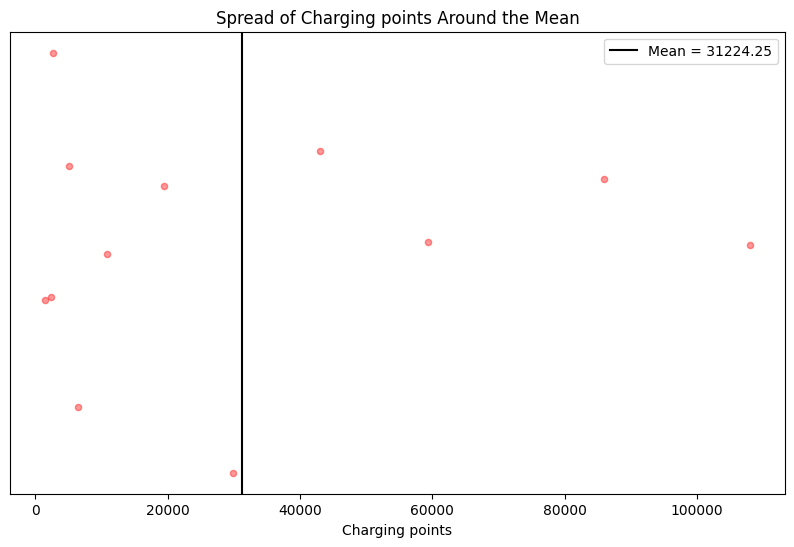

In [38]:
mean_charging_points = charging_points_df['Charging_Points'].mean()
plt.figure(figsize=(10, 6))
plt.axvline(mean_charging_points, color='black', linestyle='-', linewidth=1.5, label=f'Mean = {mean_charging_points:.2f}')
# Jitter the y-position slightly for better visualization
y_jitter = np.random.normal(0, 0.1, size=len(charging_points_df['Charging_Points']))
plt.scatter(charging_points_df['Charging_Points'], y_jitter, color='red', alpha=0.4, s=20)
plt.yticks([])
plt.title('Spread of Charging points Around the Mean')
plt.xlabel('Charging points')
plt.legend()
plt.show()

The high variance, large standard deviation, and substantial IQR confirm that the number of charging stations in Germany has grown dramatically and unevenly over the years.

In [39]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_sales_all, charging_points_df, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "EV_Sales", "Charging_Points"]
merged_df

,Year,EV_Sales,Charging_Points
0,2010,328.0,NaN
1,2011,1958.0,NaN
2,2012,4379.0,1518.0
3,2013,7425.0,2447.0
4,2014,14228.0,2726.0
5,2015,24065.0,5070.0
6,2016,26646.0,6430.0
7,2017,58619.0,10800.0
8,2018,73433.0,19500.0
9,2019,115710.0,29900.0


We filled the missing values for the years 2010 and 2011 with the help of a little search: https://en.wikipedia.org/wiki/Plug-in_electric_vehicles_in_Germany. There it was stated that they would install 500 stations (in 2009 - 2010) and 700 stations (in 2011). We actually don't know if this happened but comparing it to the number of charging points in the following years, the values would be quite reasonable.

In [40]:
# Replacing NaN values for the 'Charging_Points' column for 2010 and 2011
merged_df.loc[merged_df["Year"] == 2010, "Charging_Points"] = 500
merged_df.loc[merged_df["Year"] == 2011, "Charging_Points"] = 700

In [41]:
merged_df

,Year,EV_Sales,Charging_Points
0,2010,328.0,500.0
1,2011,1958.0,700.0
2,2012,4379.0,1518.0
3,2013,7425.0,2447.0
4,2014,14228.0,2726.0
5,2015,24065.0,5070.0
6,2016,26646.0,6430.0
7,2017,58619.0,10800.0
8,2018,73433.0,19500.0
9,2019,115710.0,29900.0


In [42]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['EV_Sales', 'Charging_Points']].cov().iloc[0, 1]
covariance

np.float64(10459060313.208792)

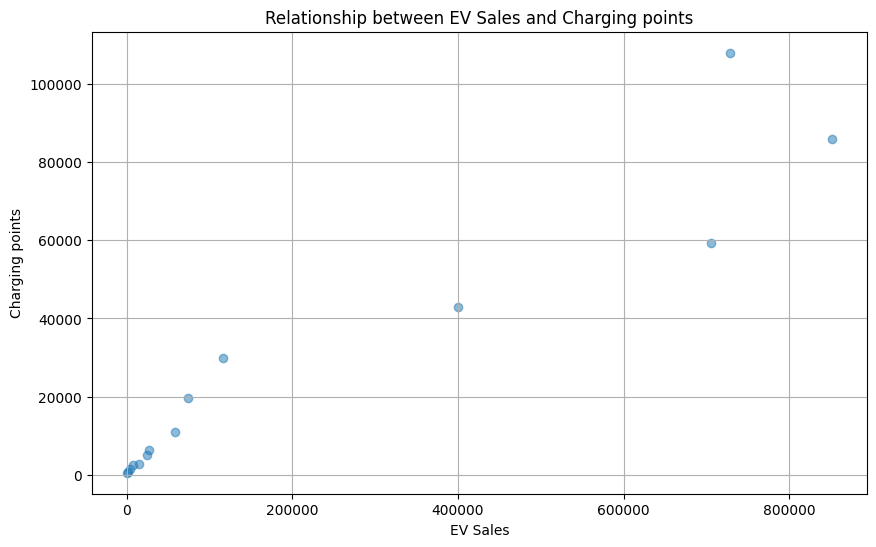

In [43]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['EV_Sales'], merged_df['Charging_Points'], alpha=0.5)
plt.title('Relationship between EV Sales and Charging points')
plt.xlabel('EV Sales')
plt.ylabel('Charging points')
plt.grid(True)
plt.show()

In [44]:
correlation, p_value = pearsonr(merged_df['EV_Sales'], merged_df['Charging_Points'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9523957652770472
P-value: 1.5158100401828284e-07


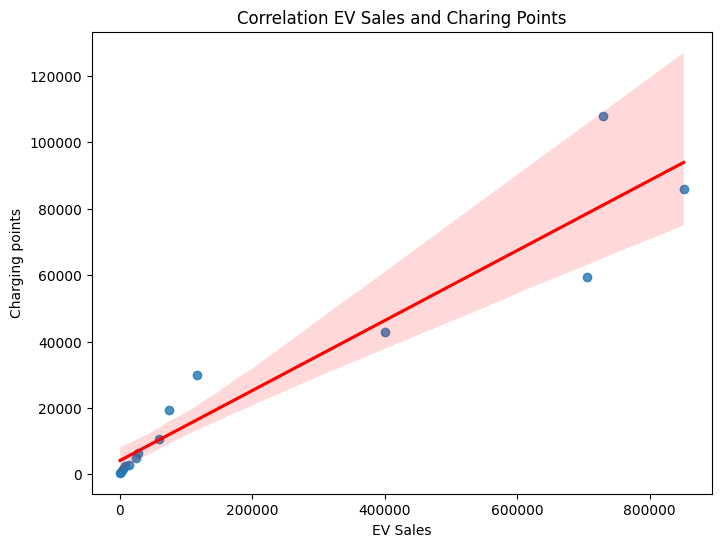

In [45]:
plt.figure(figsize=(8, 6))

# Createing scatter plot with regression line
sns.regplot(x='EV_Sales', y='Charging_Points', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Sales and Charing Points')
plt.xlabel('EV Sales')
plt.ylabel('Charging points')

plt.show()

As expected, there is a high correlation between the number of EV sales and charging points. If you sell more ev vehicles, you have to install more charging stations. Actually, the correlations of the other features is also relatable and reasonable.

### EV Stock
EV stock refers to the total number of electric vehicles currently in circulation within Germany. This feature serves as an indicator of market maturity and consumer acceptance of EVs. A growing EV stock often correlates with increased awareness, improved charging infrastructure, and enhanced support systems, all of which contribute to driving future sales. https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [46]:
file_path = 'IEA-EV-dataEV stockHistoricalCars.csv'
data = pd.read_csv(file_path)

data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [47]:
# Filtering rows where region is 'Germany' and parameter is 'EV stock'
germany_ev_stock_cars = data[(data['region'] == 'Germany') & (data['parameter'] == 'EV stock')]

# Grouping by year and calculate the sum of 'value'
germany_ev_stock_cars_sum = germany_ev_stock_cars.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_stock_cars_sum_df = germany_ev_stock_cars_sum.reset_index()
germany_ev_stock_cars_sum_df.columns = ['Year', 'Total EV Stock']

In [48]:
germany_ev_stock_cars_sum_df

,Year,Total EV Stock
0,2010,269.0
1,2011,1897.0
2,2012,5386.0
3,2013,12310.0
4,2014,25520.0
5,2015,45180.0
6,2016,66180.0
7,2017,104260.0
8,2018,165370.0
9,2019,240540.0


In [49]:
file_path_buses = 'IEA-EV-dataEV stockHistoricalBuses.csv'
data_buses = pd.read_csv(file_path_buses)

data_buses.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3.000
1,Belgium,Historical,EV stock share,Buses,EV,2010,percent,0.019
2,Belgium,Historical,EV stock share,Buses,EV,2011,percent,0.019
3,Belgium,Historical,EV stock,Buses,BEV,2011,Vehicles,3.000
4,Belgium,Historical,EV stock,Buses,BEV,2012,Vehicles,3.000


In [50]:
# Filter rows where region is 'Germany' and parameter is 'EV stock'
germany_ev_stock_buses = data_buses[(data_buses['region'] == 'Germany') & (data_buses['parameter'] == 'EV stock')]

# Group by year and calculate the sum of 'value'
germany_ev_stock_buses_sum = germany_ev_stock_buses.groupby('year')['value'].sum()

# Convert the result to a DataFrame
germany_ev_stock_buses_sum_df = germany_ev_stock_buses_sum.reset_index()
germany_ev_stock_buses_sum_df.columns = ['Year', 'Total EV Stock']
germany_ev_stock_buses_sum_df

,Year,Total EV Stock
0,2016,230.0
1,2017,260.0
2,2018,280.0
3,2019,524.0
4,2020,939.0
5,2021,1517.0
6,2022,1898.0
7,2023,3100.0


In [51]:
file_path_trucks = 'IEA-EV-dataEV stockHistoricalTrucks.csv'
data_trucks = pd.read_csv(file_path_trucks)

data_trucks.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV stock,Trucks,BEV,2010,Vehicles,2.0000
1,Belgium,Historical,EV stock share,Trucks,EV,2010,percent,0.0013
2,Belgium,Historical,EV stock share,Trucks,EV,2011,percent,0.0040
3,Belgium,Historical,EV stock,Trucks,BEV,2011,Vehicles,6.0000
4,Belgium,Historical,EV sales share,Trucks,EV,2011,percent,0.0098


In [52]:
# Filtering rows where region is 'Germany' and parameter is 'EV stock'
germany_ev_stock_trucks = data_trucks[(data_trucks['region'] == 'Germany') & (data_trucks['parameter'] == 'EV stock')]

# Grouping by year and calculate the sum of 'value'
germany_ev_stock_trucks_sum = germany_ev_stock_trucks.groupby('year')['value'].sum()

# Convert the result to a DataFrame
germany_ev_stock_trucks_sum_df = germany_ev_stock_trucks_sum.reset_index()
germany_ev_stock_trucks_sum_df.columns = ['Year', 'Total EV Stock']
germany_ev_stock_trucks_sum_df

,Year,Total EV Stock
0,2018,280.0
1,2021,770.0
2,2022,900.0
3,2023,6112.0


In [53]:
file_path_vans = 'IEA-EV-dataEV stockHistoricalVans.csv'
data_vans = pd.read_csv(file_path_vans)

data_vans.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7.000
1,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62.000
2,Belgium,Historical,EV sales share,Vans,EV,2010,percent,0.013
3,Belgium,Historical,EV stock share,Vans,EV,2010,percent,0.011
4,Belgium,Historical,EV stock share,Vans,EV,2011,percent,0.013


In [54]:
# Filtering rows where region is 'Germany' and parameter is 'EV stock'
germany_ev_stock_vans = data_vans[(data_vans['region'] == 'Germany') & (data_vans['parameter'] == 'EV stock')]

# Grouping by year and calculate the sum of 'value'
germany_ev_stock_vans_sum = germany_ev_stock_vans.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_stock_vans_sum_df = germany_ev_stock_vans_sum.reset_index()
germany_ev_stock_vans_sum_df.columns = ['Year', 'Total EV Stock']
germany_ev_stock_vans_sum_df

,Year,Total EV Stock
0,2010,222.0
1,2011,502.0
2,2012,1402.0
3,2013,2004.0
4,2014,2804.0
5,2015,3806.0
6,2016,6204.0
7,2017,11004.0
8,2018,17004.0
9,2019,22004.0


In [55]:
# Combining all four DataFrames and sum up 'Total EV Stock' for each year
all_ev_stock = pd.concat([
    germany_ev_stock_cars_sum_df,
    germany_ev_stock_buses_sum_df,
    germany_ev_stock_trucks_sum_df,
    germany_ev_stock_vans_sum_df
])

# Grouping by year and calculate the total EV stock
total_ev_stock_all = all_ev_stock.groupby('Year')['Total EV Stock'].sum().reset_index()
total_ev_stock_all

,Year,Total EV Stock
0,2010,491.0
1,2011,2399.0
2,2012,6788.0
3,2013,14314.0
4,2014,28324.0
5,2015,48986.0
6,2016,72614.0
7,2017,115524.0
8,2018,182934.0
9,2019,263068.0


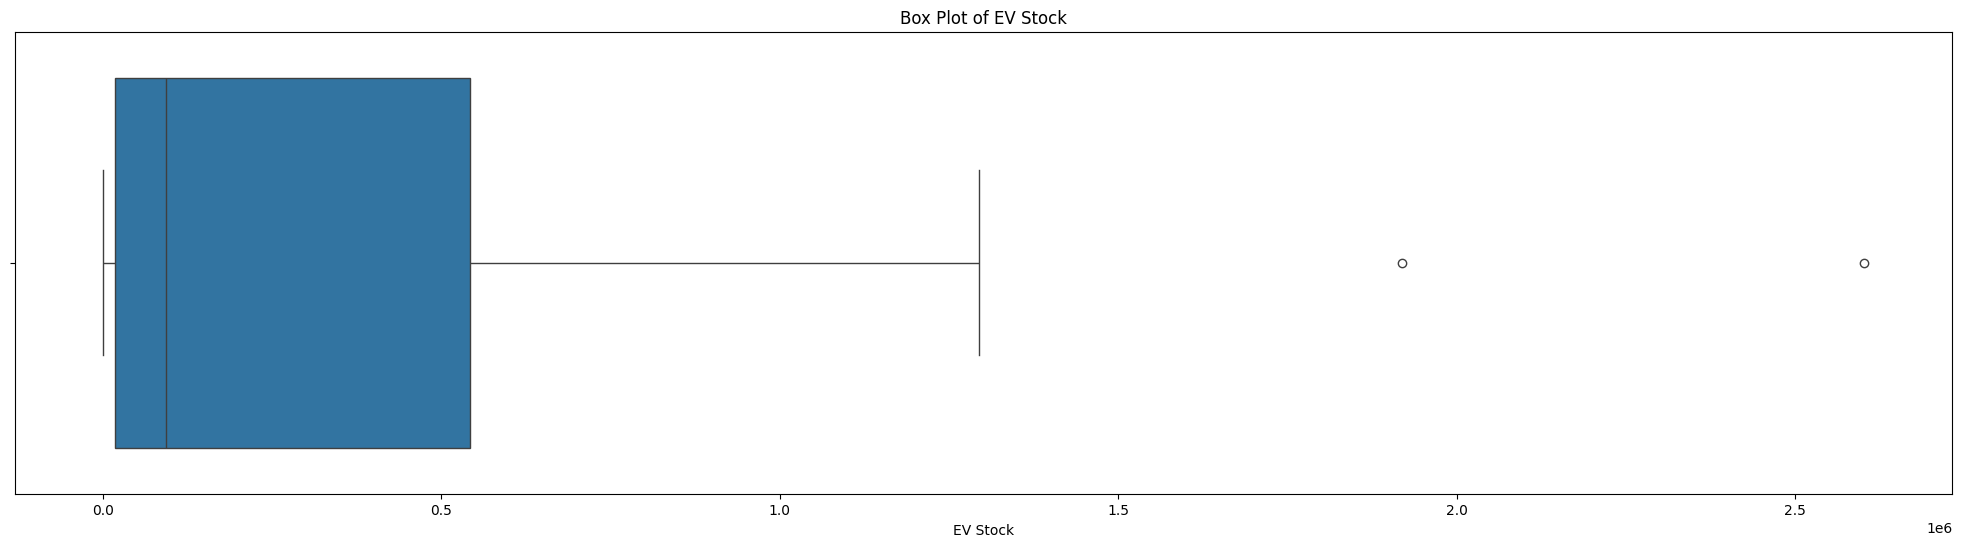

In [56]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=total_ev_stock_all, x='Total EV Stock')
plt.title('Box Plot of EV Stock')
plt.xlabel('EV Stock')
plt.show()

In [57]:
# Calculating measures of central tendency
mean_ev_stock = total_ev_stock_all["Total EV Stock"].mean()
median_ev_stock = total_ev_stock_all["Total EV Stock"].median()

# Preparing the results
central_tendency_measures = {
    "Mean": mean_ev_stock,
    "Median": median_ev_stock,
}

central_tendency_measures

{'Mean': np.float64(513448.64285714284), 'Median': np.float64(94069.0)}

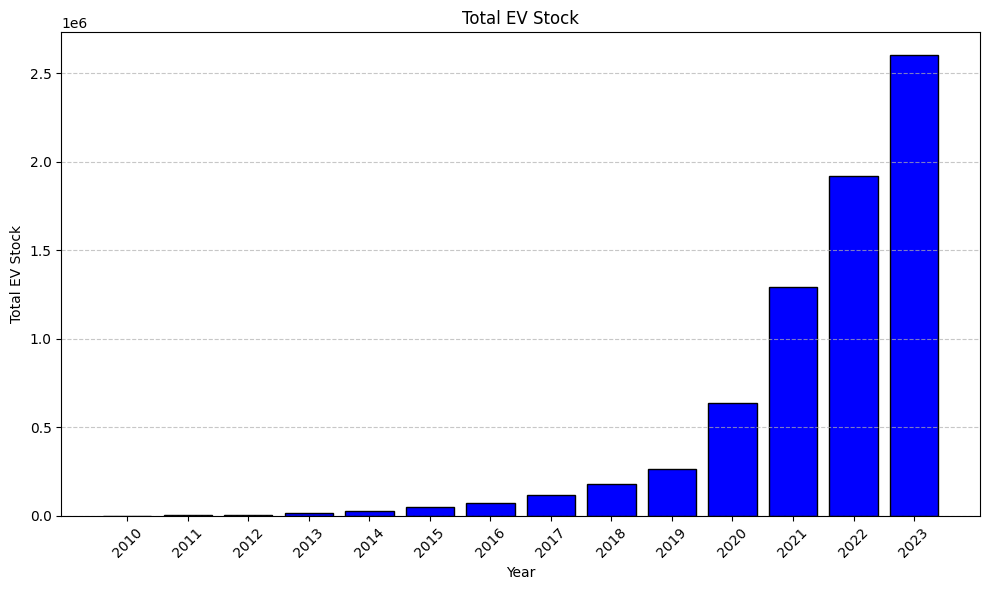

In [58]:
# Plotting the histogram for EV sales
plt.figure(figsize=(10, 6))
plt.bar(total_ev_stock_all["Year"], total_ev_stock_all["Total EV Stock"], color="blue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Total EV Stock")
plt.title("Total EV Stock")
plt.xticks(total_ev_stock_all["Year"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The large gap between the mean and median reflects a non-linear growth pattern in EV stock in Germany. In the early years, EV adoption was slow, resulting in low stock numbers. However, in the later years the stock grew very fast.

In [59]:
variance_ev_stock = total_ev_stock_all['Total EV Stock'].var()
variance_ev_stock

np.float64(689979309999.9396)

In [60]:
std_ev_stock = total_ev_stock_all['Total EV Stock'].std()
std_ev_stock

np.float64(830649.9322819087)

In [61]:
q1 = total_ev_stock_all['Total EV Stock'].quantile(0.25)
q3 = total_ev_stock_all['Total EV Stock'].quantile(0.75)
iqr_ev_stock = q3 - q1
iqr_ev_stock

np.float64(525614.25)

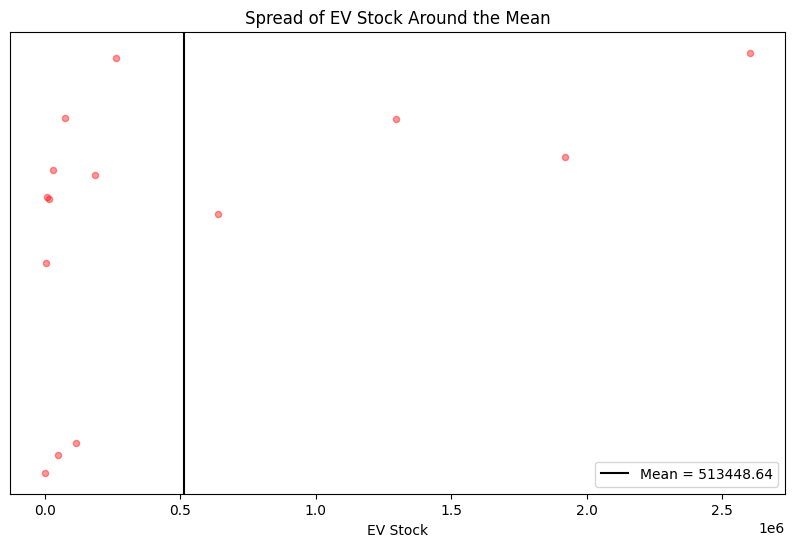

In [62]:
mean_ev_stock = total_ev_stock_all['Total EV Stock'].mean()
plt.figure(figsize=(10, 6))
plt.axvline(mean_ev_stock, color='black', linestyle='-', linewidth=1.5, label=f'Mean = {mean_ev_stock:.2f}')
# Jitter the y-position slightly for better visualization
y_jitter = np.random.normal(0, 0.1, size=len(total_ev_stock_all['Total EV Stock']))
plt.scatter(total_ev_stock_all['Total EV Stock'], y_jitter, color='red', alpha=0.4, s=20)
plt.yticks([])
plt.title('Spread of EV Stock Around the Mean')
plt.xlabel('EV Stock')
plt.legend()
plt.show()

The large variance, high standard deviation, and substantial IQR demonstrate that EV stock in Germany has experienced dramatic growth over the analyzed period.

In [63]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_sales_all, total_ev_stock_all, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "EV_Sales", "Total EV Stock"]
merged_df

,Year,EV_Sales,Total EV Stock
0,2010,328.0,491.0
1,2011,1958.0,2399.0
2,2012,4379.0,6788.0
3,2013,7425.0,14314.0
4,2014,14228.0,28324.0
5,2015,24065.0,48986.0
6,2016,26646.0,72614.0
7,2017,58619.0,115524.0
8,2018,73433.0,182934.0
9,2019,115710.0,263068.0


In [64]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['EV_Sales', 'Total EV Stock']].cov().iloc[0, 1]
covariance

np.float64(246609110760.02197)

In [65]:
correlation, p_value = pearsonr(merged_df['EV_Sales'], merged_df['Total EV Stock'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9427041009617874
P-value: 4.511322829766388e-07


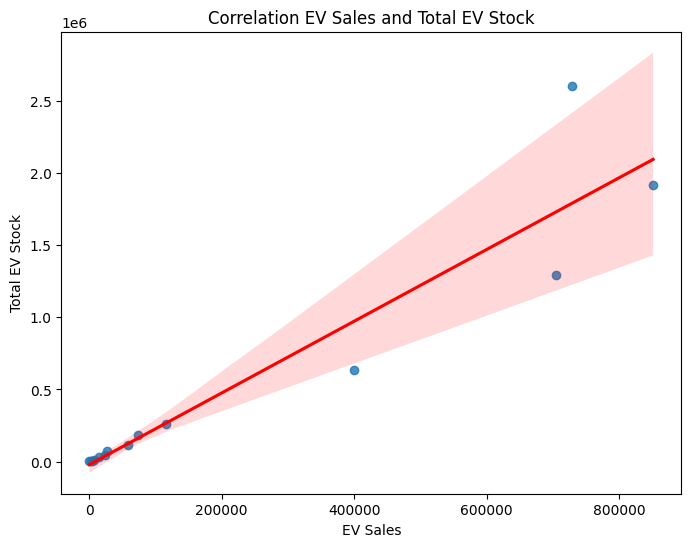

In [66]:
plt.figure(figsize=(8, 6))

# Creating scatter plot with regression line
sns.regplot(x='EV_Sales', y='Total EV Stock', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Sales and Total EV Stock')
plt.xlabel('EV Sales')
plt.ylabel('Total EV Stock')

plt.show()

In [67]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_stock_all, charging_points_df, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "Total EV Stock", "Charging_Points"]
merged_df

,Year,Total EV Stock,Charging_Points
0,2010,491.0,NaN
1,2011,2399.0,NaN
2,2012,6788.0,1518.0
3,2013,14314.0,2447.0
4,2014,28324.0,2726.0
5,2015,48986.0,5070.0
6,2016,72614.0,6430.0
7,2017,115524.0,10800.0
8,2018,182934.0,19500.0
9,2019,263068.0,29900.0


In [68]:
# Replace NaN values for the 'Charging_Points' column for 2010 and 2011
merged_df.loc[merged_df["Year"] == 2010, "Charging_Points"] = 500
merged_df.loc[merged_df["Year"] == 2011, "Charging_Points"] = 700
merged_df

,Year,Total EV Stock,Charging_Points
0,2010,491.0,500.0
1,2011,2399.0,700.0
2,2012,6788.0,1518.0
3,2013,14314.0,2447.0
4,2014,28324.0,2726.0
5,2015,48986.0,5070.0
6,2016,72614.0,6430.0
7,2017,115524.0,10800.0
8,2018,182934.0,19500.0
9,2019,263068.0,29900.0


In [69]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['Total EV Stock', 'Charging_Points']].cov().iloc[0, 1]
covariance

np.float64(28519308314.906593)

In [70]:
correlation, p_value = pearsonr(merged_df['Total EV Stock'], merged_df['Charging_Points'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9846036227550937
P-value: 1.860507514503386e-10


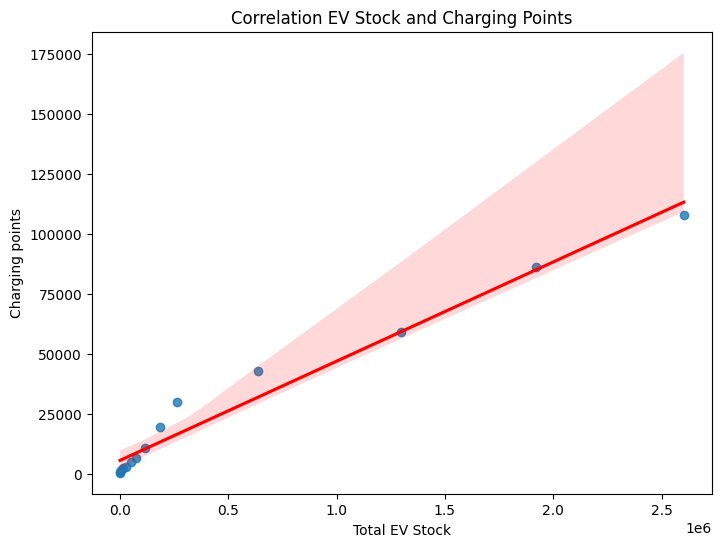

In [71]:
plt.figure(figsize=(8, 6))

# Creating scatter plot with regression line
sns.regplot(x='Total EV Stock', y='Charging_Points', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Stock and Charging Points')
plt.xlabel('Total EV Stock')
plt.ylabel('Charging points')

plt.show()

### EV Stock share
EV stock share represents the proportion of electric vehicles relative to the total vehicle fleet in Germany. This metric indicates the market penetration of EVs and the pace of transition from internal combustion engine vehicles to electric mobility. A higher EV stock share suggests increasing consumer adoption and a shift toward sustainable transportation solutions. https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [72]:
file_path_cars_stock_share = 'IEA-EV-dataEV stockHistoricalCars.csv'
data_cars_stock_share = pd.read_csv(file_path_cars_stock_share)

# Filtering rows where region is 'Germany' and parameter is 'EV stock share'
germany_ev_stock_share = data_cars_stock_share[(data_cars_stock_share['region'] == 'Germany') & (data_cars_stock_share['parameter'] == 'EV stock share')]

# Grouping by year and calculate the sum of 'value'
germany_ev_stock_share_sum = germany_ev_stock_share.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_stock_share_sum_df = germany_ev_stock_share_sum.reset_index()
germany_ev_stock_share_sum_df.columns = ['Year', 'Total EV Stock Share']
germany_ev_stock_share_sum_df

,Year,Total EV Stock Share
0,2010,0.00058
1,2011,0.00440
2,2012,0.01200
3,2013,0.02800
4,2014,0.05600
5,2015,0.09700
6,2016,0.14000
7,2017,0.22000
8,2018,0.35000
9,2019,0.50000


In [73]:
file_path_buses_stock_share = 'IEA-EV-dataEV stockHistoricalBuses.csv'
data_buses_stock_share = pd.read_csv(file_path_buses_stock_share)

# Filteringrows where region is 'Germany' and parameter is 'EV stock share'
germany_ev_stock_share_buses = data_buses_stock_share[
    (data_buses_stock_share['region'] == 'Germany') & (data_buses_stock_share['parameter'] == 'EV stock share')
]

# Grouping by year and calculate the sum of 'value'
germany_ev_stock_share_buses_sum = germany_ev_stock_share_buses.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_stock_share_buses_sum_df = germany_ev_stock_share_buses_sum.reset_index()
germany_ev_stock_share_buses_sum_df.columns = ['Year', 'Total EV Stock Share']
germany_ev_stock_share_buses_sum_df

,Year,Total EV Stock Share
0,2016,0.29
1,2017,0.33
2,2018,0.35
3,2019,0.64
4,2020,1.20
5,2021,1.80
6,2022,2.30
7,2023,3.80


In [74]:
file_path_trucks_stock_share = 'IEA-EV-dataEV stockHistoricalTrucks.csv'
data_trucks_stock_share = pd.read_csv(file_path_trucks_stock_share)

# Filtering rows where region is 'Germany' and parameter is 'EV stock share'
germany_ev_stock_share_trucks = data_trucks_stock_share[
    (data_trucks_stock_share['region'] == 'Germany') & (data_trucks_stock_share['parameter'] == 'EV stock share')
]

# Grouping by year and calculate the sum of 'value'
germany_ev_stock_share_trucks_sum = germany_ev_stock_share_trucks.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_stock_share_trucks_sum_df = germany_ev_stock_share_trucks_sum.reset_index()
germany_ev_stock_share_trucks_sum_df.columns = ['Year', 'Total EV Stock Share']
germany_ev_stock_share_trucks_sum_df

,Year,Total EV Stock Share
0,2018,0.030
1,2021,0.080
2,2022,0.095
3,2023,0.650


In [75]:
file_path_vans_stock_share = 'IEA-EV-dataEV stockHistoricalVans.csv'
data_vans_stock_share = pd.read_csv(file_path_vans_stock_share)

# Filtering rows where region is 'Germany' and parameter is 'EV stock share'
germany_ev_stock_share_vans = data_vans_stock_share[
    (data_vans_stock_share['region'] == 'Germany') & (data_vans_stock_share['parameter'] == 'EV stock share')
]

# Grouping by year and calculate the sum of 'value'
germany_ev_stock_share_vans_sum = germany_ev_stock_share_vans.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_stock_share_vans_sum_df = germany_ev_stock_share_vans_sum.reset_index()
germany_ev_stock_share_vans_sum_df.columns = ['Year', 'Total EV Stock Share']

In [76]:
germany_ev_stock_share_vans_sum_df

,Year,Total EV Stock Share
0,2010,0.012
1,2011,0.024
2,2012,0.067
3,2013,0.093
4,2014,0.120
5,2015,0.160
6,2016,0.250
7,2017,0.440
8,2018,0.610
9,2019,0.770


In [77]:
# Combineing all four DataFrames and sum up 'Total EV Stock Share' for each year
all_ev_stock_share = pd.concat([
    germany_ev_stock_share_sum_df,
    germany_ev_stock_share_buses_sum_df,
    germany_ev_stock_share_trucks_sum_df,
    germany_ev_stock_share_vans_sum_df
])

# Grouping by year and calculate the total EV stock share
total_ev_stock_share_all = all_ev_stock_share.groupby('Year')['Total EV Stock Share'].sum().reset_index()
total_ev_stock_share_all

,Year,Total EV Stock Share
0,2010,0.01258
1,2011,0.02840
2,2012,0.07900
3,2013,0.12100
4,2014,0.17600
5,2015,0.25700
6,2016,0.68000
7,2017,0.99000
8,2018,1.34000
9,2019,1.91000


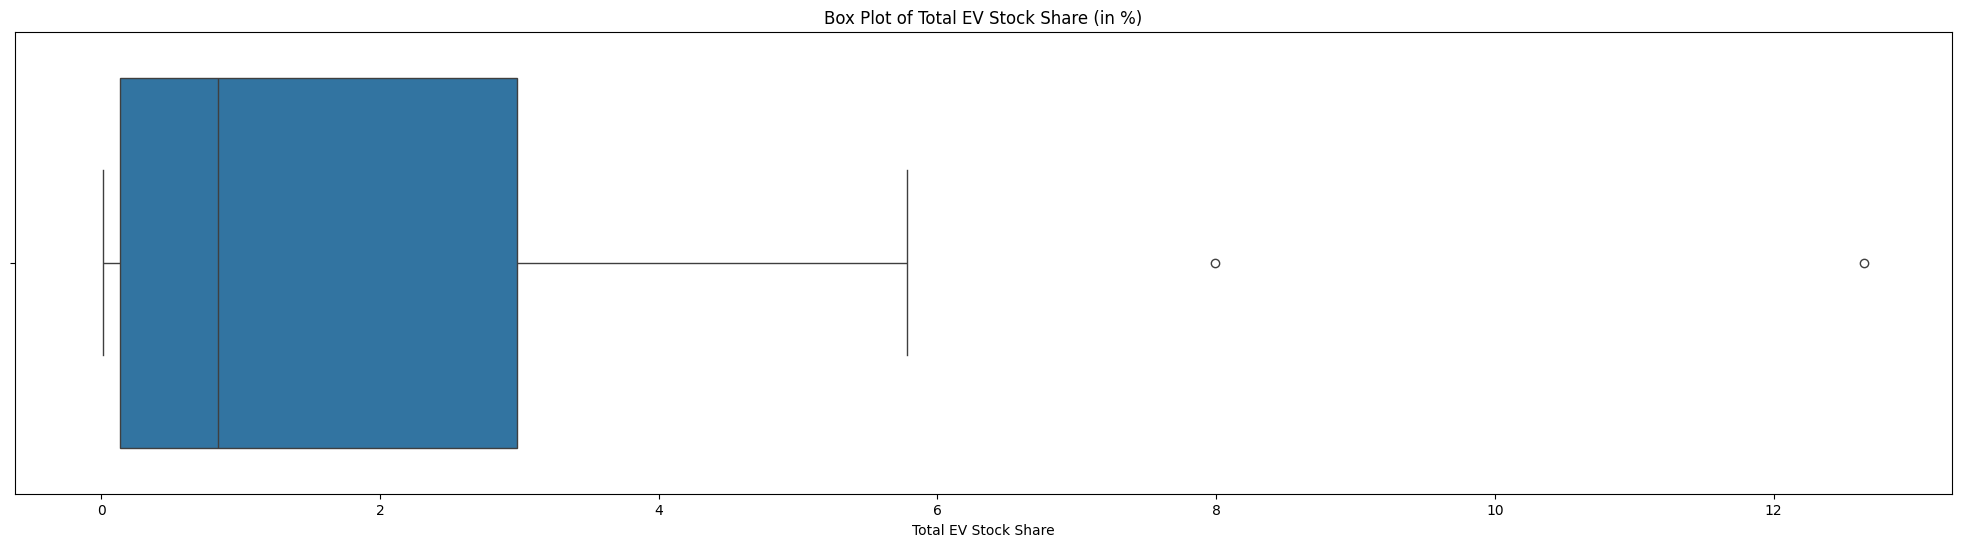

In [78]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=total_ev_stock_share_all, x='Total EV Stock Share')
plt.title('Box Plot of Total EV Stock Share (in %)')
plt.xlabel('Total EV Stock Share')
plt.show()

In [79]:
# Calculating measures of central tendency
mean_all_ev_stock_share = total_ev_stock_share_all["Total EV Stock Share"].mean()
median_all_ev_stock_share = total_ev_stock_share_all["Total EV Stock Share"].median()

# Preparing the results
central_tendency_measures = {
    "Mean": mean_all_ev_stock_share,
    "Median": median_all_ev_stock_share,
}

central_tendency_measures

{'Mean': np.float64(2.52564141608309),
 'Median': np.float64(0.8350000008940697)}

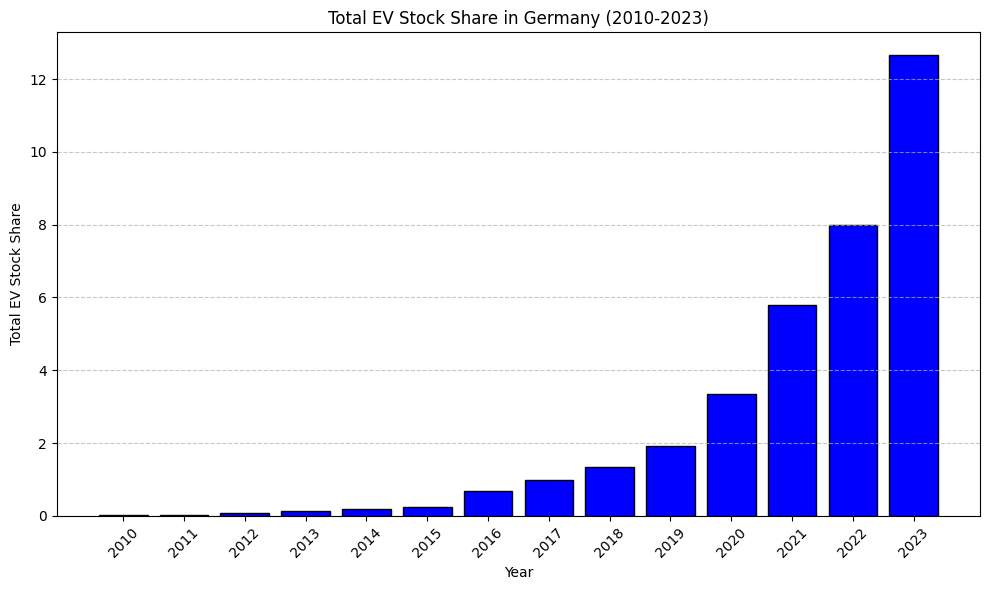

In [80]:
# Plotting the histogram for EV sales
plt.figure(figsize=(10, 6))
plt.bar(total_ev_stock_share_all["Year"], total_ev_stock_share_all["Total EV Stock Share"], color="blue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Total EV Stock Share")
plt.title("Total EV Stock Share in Germany (2010-2023)")
plt.xticks(total_ev_stock_share_all["Year"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [81]:
variance_total_ev_stock_share_all = total_ev_stock_share_all['Total EV Stock Share'].var()
variance_total_ev_stock_share_all

np.float64(14.323653179014894)

In [82]:
std_total_ev_stock_share_all = total_ev_stock_share_all['Total EV Stock Share'].std()
std_total_ev_stock_share_all

np.float64(3.7846602461799517)

In [83]:
q1 = total_ev_stock_share_all['Total EV Stock Share'].quantile(0.25)
q3 = total_ev_stock_share_all['Total EV Stock Share'].quantile(0.75)
iqr_total_ev_stock_share_all = q3 - q1
iqr_total_ev_stock_share_all

np.float64(2.847749969922006)

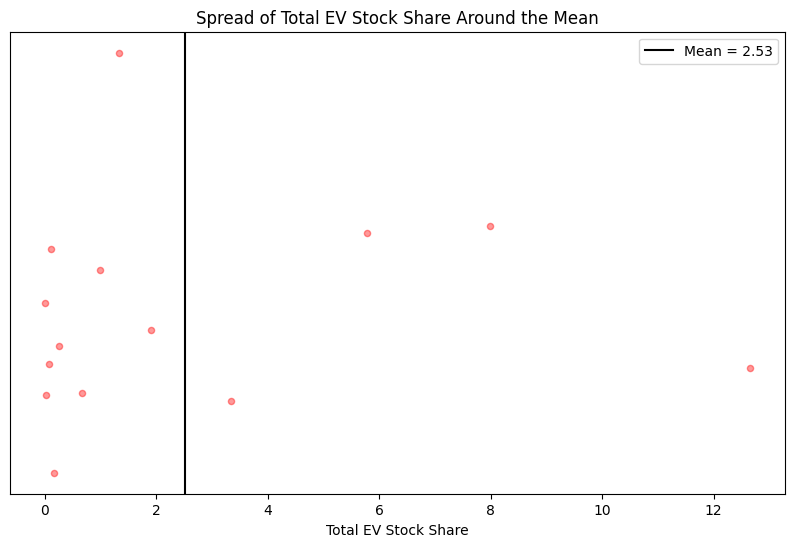

In [84]:
mean_total_ev_stock_share_all = total_ev_stock_share_all['Total EV Stock Share'].mean()
plt.figure(figsize=(10, 6))
plt.axvline(mean_total_ev_stock_share_all, color='black', linestyle='-', linewidth=1.5, label=f'Mean = {mean_total_ev_stock_share_all:.2f}')
# Jitter the y-position slightly for better visualization
y_jitter = np.random.normal(0, 0.1, size=len(total_ev_stock_share_all['Total EV Stock Share']))
plt.scatter(total_ev_stock_share_all['Total EV Stock Share'], y_jitter, color='red', alpha=0.4, s=20)
plt.yticks([])
plt.title('Spread of Total EV Stock Share Around the Mean')
plt.xlabel('Total EV Stock Share')
plt.legend()
plt.show()

In [85]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_sales_all, total_ev_stock_share_all, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "EV_Sales", "Total EV Stock Share"]
merged_df

,Year,EV_Sales,Total EV Stock Share
0,2010,328.0,0.01258
1,2011,1958.0,0.02840
2,2012,4379.0,0.07900
3,2013,7425.0,0.12100
4,2014,14228.0,0.17600
5,2015,24065.0,0.25700
6,2016,26646.0,0.68000
7,2017,58619.0,0.99000
8,2018,73433.0,1.34000
9,2019,115710.0,1.91000


In [86]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['EV_Sales', 'Total EV Stock Share']].cov().iloc[0, 1]
covariance

np.float64(1095139.0392688443)

In [87]:
correlation, p_value = pearsonr(merged_df['EV_Sales'], merged_df['Total EV Stock Share'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9188120360337939
P-value: 3.4646424828203633e-06


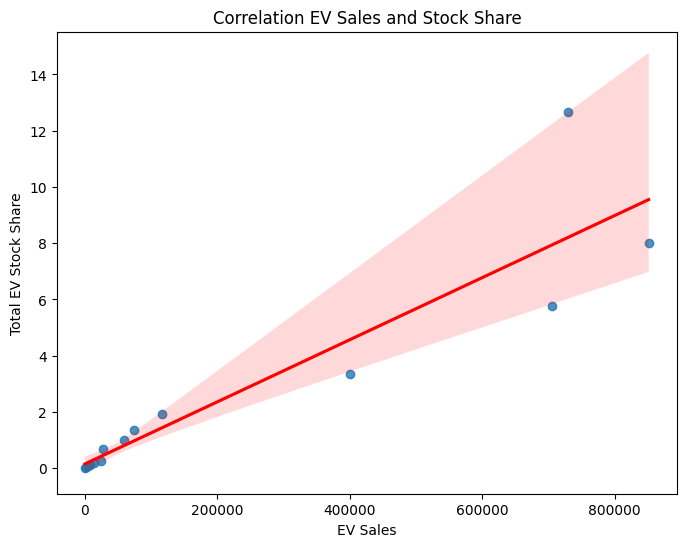

In [88]:
plt.figure(figsize=(8, 6))

# Createing scatter plot with regression line
sns.regplot(x='EV_Sales', y='Total EV Stock Share', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Sales and Stock Share')
plt.xlabel('EV Sales')
plt.ylabel('Total EV Stock Share')

# Show plot
plt.show()

In [89]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_stock_share_all, charging_points_df, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "Total EV Stock Share", "Charging_Points"]
merged_df

,Year,Total EV Stock Share,Charging_Points
0,2010,0.01258,NaN
1,2011,0.02840,NaN
2,2012,0.07900,1518.0
3,2013,0.12100,2447.0
4,2014,0.17600,2726.0
5,2015,0.25700,5070.0
6,2016,0.68000,6430.0
7,2017,0.99000,10800.0
8,2018,1.34000,19500.0
9,2019,1.91000,29900.0


In [90]:
# Replacing NaN values for the 'Charging_Points' column for 2010 and 2011
merged_df.loc[merged_df["Year"] == 2010, "Charging_Points"] = 500
merged_df.loc[merged_df["Year"] == 2011, "Charging_Points"] = 700
merged_df

,Year,Total EV Stock Share,Charging_Points
0,2010,0.01258,500.0
1,2011,0.02840,700.0
2,2012,0.07900,1518.0
3,2013,0.12100,2447.0
4,2014,0.17600,2726.0
5,2015,0.25700,5070.0
6,2016,0.68000,6430.0
7,2017,0.99000,10800.0
8,2018,1.34000,19500.0
9,2019,1.91000,29900.0


In [91]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['Total EV Stock Share', 'Charging_Points']].cov().iloc[0, 1]
covariance

np.float64(130100.49688766613)

In [92]:
correlation, p_value = pearsonr(merged_df['Total EV Stock Share'], merged_df['Charging_Points'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9858084397908087
P-value: 1.144007364514063e-10


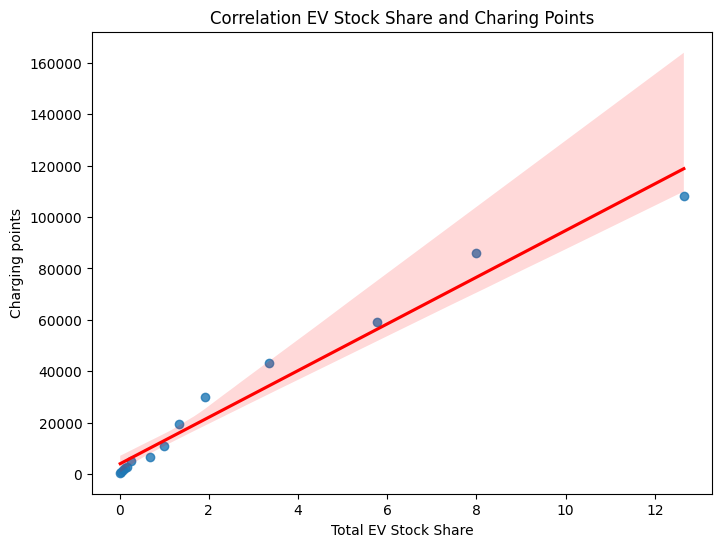

In [93]:
plt.figure(figsize=(8, 6))

# Createing scatter plot with regression line
sns.regplot(x='Total EV Stock Share', y='Charging_Points', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Stock Share and Charing Points')
plt.xlabel('Total EV Stock Share')
plt.ylabel('Charging points')

# Show plot
plt.show()

In [94]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_stock_all, total_ev_stock_share_all, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "Total EV Stock", "Total EV Stock Share"]
merged_df

,Year,Total EV Stock,Total EV Stock Share
0,2010,491.0,0.01258
1,2011,2399.0,0.02840
2,2012,6788.0,0.07900
3,2013,14314.0,0.12100
4,2014,28324.0,0.17600
5,2015,48986.0,0.25700
6,2016,72614.0,0.68000
7,2017,115524.0,0.99000
8,2018,182934.0,1.34000
9,2019,263068.0,1.91000


In [95]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['Total EV Stock', 'Total EV Stock Share']].cov().iloc[0, 1]
covariance

np.float64(3126700.285463996)

In [96]:
correlation, p_value = pearsonr(merged_df['Total EV Stock'], merged_df['Total EV Stock Share'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9945836621545578
P-value: 3.6031346344635716e-13


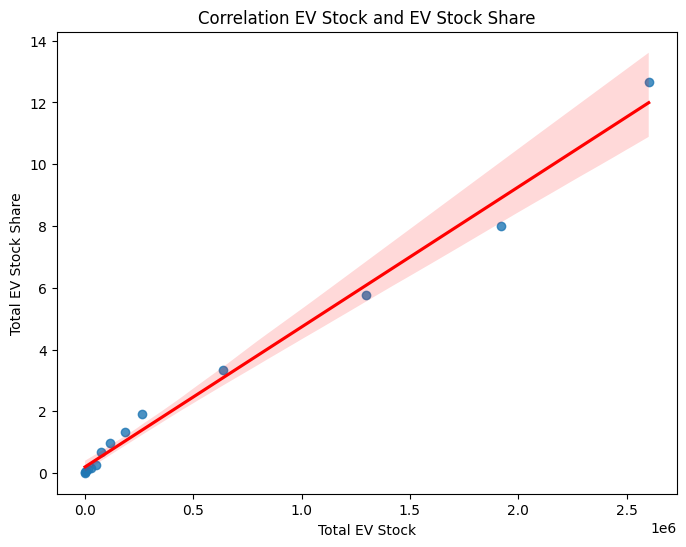

In [97]:
plt.figure(figsize=(8, 6))

# Creating scatter plot with regression line
sns.regplot(x='Total EV Stock', y='Total EV Stock Share', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Stock and EV Stock Share')
plt.xlabel('Total EV Stock')
plt.ylabel('Total EV Stock Share')

plt.show()

### EV sales share
EV sales share represents the proportion of electric vehicle sales relative to total vehicle sales within a given time frame in Germany. This metric reflects the growing consumer preference for EVs over traditional vehicles and provides insights into the pace of market transformation. A rising EV sales share indicates increased acceptance of electric mobility. https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer

In [98]:
file_path_cars_sales_share = 'IEA-EV-dataEV sales shareHistoricalCars.csv'
data_cars_sales_share = pd.read_csv(file_path_cars_sales_share)

# Filtering rows where region is 'Germany' and parameter is 'EV sales share'
germany_ev_sales_share = data_cars_sales_share[
    (data_cars_sales_share['region'] == 'Germany') & (data_cars_sales_share['parameter'] == 'EV sales share')
]

# Grouping by year and calculate the sum of 'value'
germany_ev_sales_share_sum = germany_ev_sales_share.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_sales_share_sum_df = germany_ev_sales_share_sum.reset_index()
germany_ev_sales_share_sum_df.columns = ['Year', 'Total EV Sales Share']
germany_ev_sales_share_sum_df

,Year,Total EV Sales Share
0,2010,0.0049
1,2011,0.0520
2,2012,0.1100
3,2013,0.2300
4,2014,0.4500
5,2015,0.7300
6,2016,0.7400
7,2017,1.6000
8,2018,2.0000
9,2019,3.0000


In [99]:
# Load the uploaded file for EV sales share analysis (Buses)
file_path_buses_sales_share = 'IEA-EV-dataEV sales shareHistoricalBuses.csv'
data_buses_sales_share = pd.read_csv(file_path_buses_sales_share)

# Filter rows where region is 'Germany' and parameter is 'EV sales share'
germany_ev_sales_share_buses = data_buses_sales_share[
    (data_buses_sales_share['region'] == 'Germany') & (data_buses_sales_share['parameter'] == 'EV sales share')
]

# Group by year and calculate the sum of 'value'
germany_ev_sales_share_buses_sum = germany_ev_sales_share_buses.groupby('year')['value'].sum()

# Convert the result to a DataFrame for better readability
germany_ev_sales_share_buses_sum_df = germany_ev_sales_share_buses_sum.reset_index()
germany_ev_sales_share_buses_sum_df.columns = ['Year', 'Total EV Sales Share']
germany_ev_sales_share_buses_sum_df

,Year,Total EV Sales Share
0,2016,3.40
1,2017,0.43
2,2018,0.64
3,2019,3.10
4,2020,6.10
5,2021,9.50
6,2022,13.00
7,2023,15.00


In [100]:
file_path_trucks_sales_share = 'IEA-EV-dataEV sales shareHistoricalTrucks.csv'
data_trucks_sales_share = pd.read_csv(file_path_trucks_sales_share)

# Filtering rows where region is 'Germany' and parameter is 'EV sales share'
germany_ev_sales_share_trucks = data_trucks_sales_share[
    (data_trucks_sales_share['region'] == 'Germany') & (data_trucks_sales_share['parameter'] == 'EV sales share')
]

# Grouping by year and calculate the sum of 'value'
germany_ev_sales_share_trucks_sum = germany_ev_sales_share_trucks.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_sales_share_trucks_sum_df = germany_ev_sales_share_trucks_sum.reset_index()
germany_ev_sales_share_trucks_sum_df.columns = ['Year', 'Total EV Sales Share']
germany_ev_sales_share_trucks_sum_df

,Year,Total EV Sales Share
0,2018,0.30
1,2019,0.63
2,2020,1.10
3,2021,1.30
4,2022,1.50
5,2023,2.30


In [101]:
file_path_vans_sales_share = 'IEA-EV-dataEV sales shareHistoricalVans.csv'
data_vans_sales_share = pd.read_csv(file_path_vans_sales_share)

# Filtering rows where region is 'Germany' and parameter is 'EV sales share'
germany_ev_sales_share_vans = data_vans_sales_share[
    (data_vans_sales_share['region'] == 'Germany') & (data_vans_sales_share['parameter'] == 'EV sales share')
]

# Grouping by year and calculate the sum of 'value'
germany_ev_sales_share_vans_sum = germany_ev_sales_share_vans.groupby('year')['value'].sum()

# Converting the result to a DataFrame
germany_ev_sales_share_vans_sum_df = germany_ev_sales_share_vans_sum.reset_index()
germany_ev_sales_share_vans_sum_df.columns = ['Year', 'Total EV Sales Share']
germany_ev_sales_share_vans_sum_df

,Year,Total EV Sales Share
0,2010,0.087
1,2011,0.120
2,2012,0.430
3,2013,0.290
4,2014,0.320
5,2015,0.440
6,2016,0.970
7,2017,1.700
8,2018,2.200
9,2019,2.300


In [102]:
# Combining all four DataFrames and sum up 'Total EV Sales Share' for each year
all_ev_sales_share = pd.concat([
    germany_ev_sales_share_sum_df,
    germany_ev_sales_share_buses_sum_df,
    germany_ev_sales_share_trucks_sum_df,
    germany_ev_sales_share_vans_sum_df
])

# Grouping by year and calculate the total EV stock share
total_ev_sales_share_all = all_ev_sales_share.groupby('Year')['Total EV Sales Share'].sum().reset_index()
total_ev_sales_share_all

,Year,Total EV Sales Share
0,2010,0.0919
1,2011,0.1720
2,2012,0.5400
3,2013,0.5200
4,2014,0.7700
5,2015,1.1700
6,2016,5.1100
7,2017,3.7300
8,2018,5.1400
9,2019,9.0300


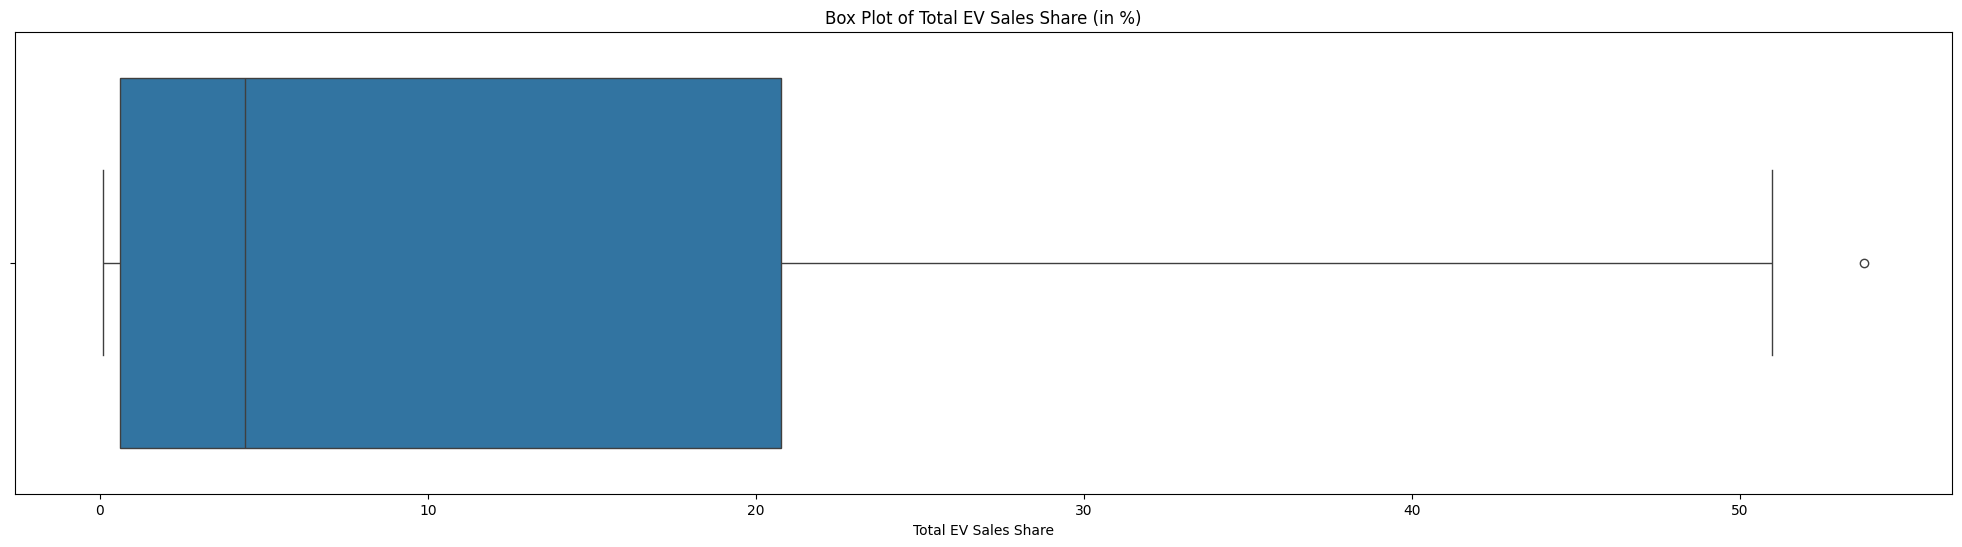

In [103]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=total_ev_sales_share_all, x='Total EV Sales Share')
plt.title('Box Plot of Total EV Sales Share (in %)')
plt.xlabel('Total EV Sales Share')
plt.show()

In [104]:
# Calculating measures of central tendency
mean_all_ev_sales_share = total_ev_sales_share_all["Total EV Sales Share"].mean()
median_all_ev_sales_share = total_ev_sales_share_all["Total EV Sales Share"].median()

# Preparing the results
central_tendency_measures = {
    "Mean": mean_all_ev_sales_share,
    "Median": median_all_ev_sales_share,
}

central_tendency_measures

{'Mean': np.float64(14.119564274525535),
 'Median': np.float64(4.420000106096268)}

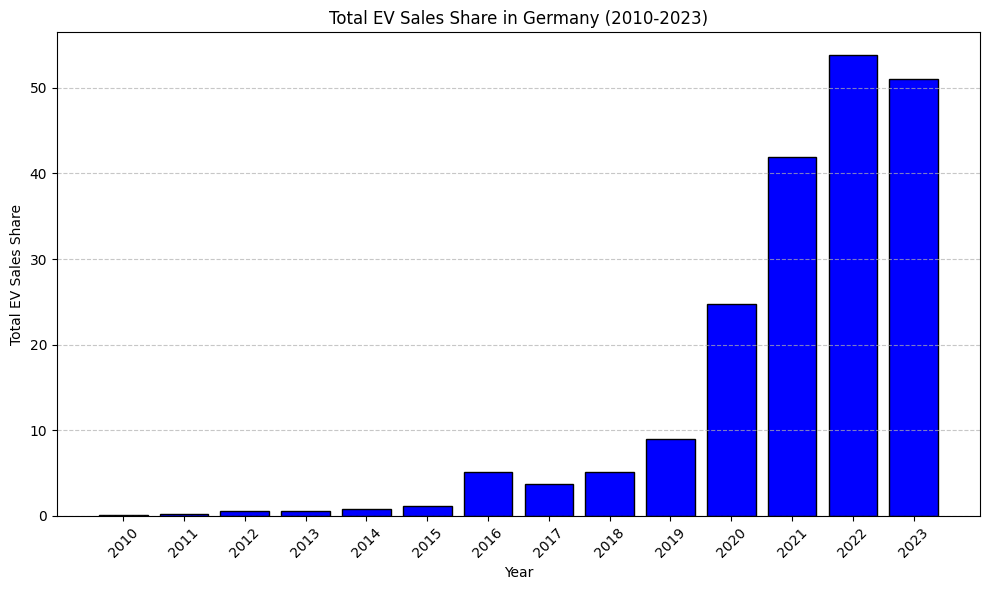

In [105]:
# Plotting the histogram for EV sales
plt.figure(figsize=(10, 6))
plt.bar(total_ev_sales_share_all["Year"], total_ev_sales_share_all["Total EV Sales Share"], color="blue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Total EV Sales Share")
plt.title("Total EV Sales Share in Germany (2010-2023)")
plt.xticks(total_ev_sales_share_all["Year"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [106]:
variance_total_ev_sales_share_all = total_ev_sales_share_all['Total EV Sales Share'].var()
variance_total_ev_sales_share_all

np.float64(401.58599813983466)

In [107]:
std_total_ev_sales_share_all = total_ev_sales_share_all['Total EV Sales Share'].std()
std_total_ev_sales_share_all

np.float64(20.039610728251052)

In [108]:
q1 = total_ev_sales_share_all['Total EV Sales Share'].quantile(0.25)
q3 = total_ev_sales_share_all['Total EV Sales Share'].quantile(0.75)
iqr_total_ev_sales_share_all = q3 - q1
iqr_total_ev_sales_share_all

np.float64(20.18499990925193)

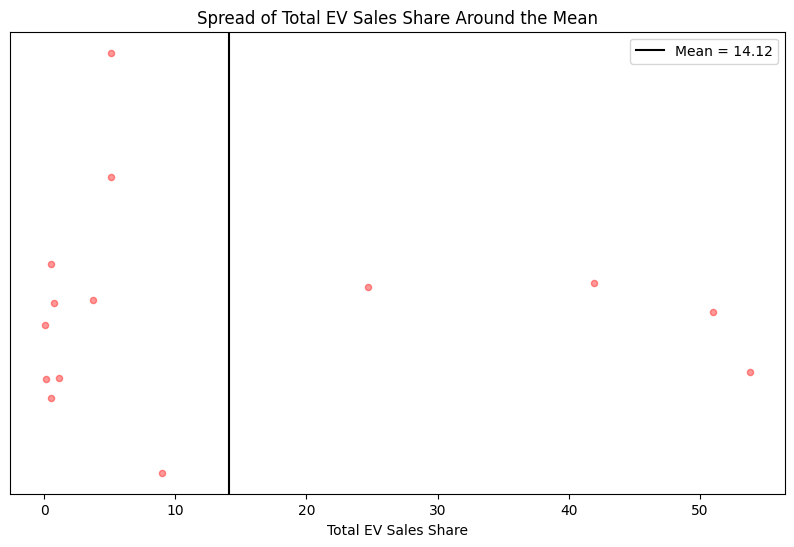

In [109]:
mean_total_ev_sales_share_all = total_ev_sales_share_all['Total EV Sales Share'].mean()
plt.figure(figsize=(10, 6))
plt.axvline(mean_total_ev_sales_share_all, color='black', linestyle='-', linewidth=1.5, label=f'Mean = {mean_total_ev_sales_share_all:.2f}')
# Jitter the y-position slightly for better visualization
y_jitter = np.random.normal(0, 0.1, size=len(total_ev_sales_share_all['Total EV Sales Share']))
plt.scatter(total_ev_sales_share_all['Total EV Sales Share'], y_jitter, color='red', alpha=0.4, s=20)
plt.yticks([])
plt.title('Spread of Total EV Sales Share Around the Mean')
plt.xlabel('Total EV Sales Share')
plt.legend()
plt.show()

In [110]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_sales_all, total_ev_sales_share_all, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "EV_Sales", "Total EV Sales Share"]
merged_df

,Year,EV_Sales,Total EV Sales Share
0,2010,328.0,0.0919
1,2011,1958.0,0.1720
2,2012,4379.0,0.5400
3,2013,7425.0,0.5200
4,2014,14228.0,0.7700
5,2015,24065.0,1.1700
6,2016,26646.0,5.1100
7,2017,58619.0,3.7300
8,2018,73433.0,5.1400
9,2019,115710.0,9.0300


In [111]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['EV_Sales', 'Total EV Sales Share']].cov().iloc[0, 1]
covariance

np.float64(6284846.972141099)

In [112]:
correlation, p_value = pearsonr(merged_df['EV_Sales'], merged_df['Total EV Sales Share'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9958403969638606
P-value: 7.411892210827344e-14


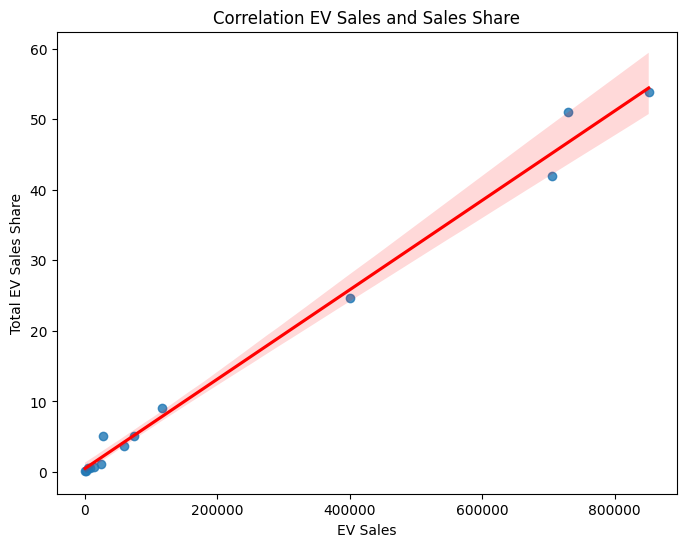

In [113]:
plt.figure(figsize=(8, 6))

# Creating scatter plot with regression line
sns.regplot(x='EV_Sales', y='Total EV Sales Share', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Sales and Sales Share')
plt.xlabel('EV Sales')
plt.ylabel('Total EV Sales Share')

plt.show()

In [114]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_sales_share_all, charging_points_df, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "Total EV Sales Share", "Charging_Points"]
merged_df

,Year,Total EV Sales Share,Charging_Points
0,2010,0.0919,NaN
1,2011,0.1720,NaN
2,2012,0.5400,1518.0
3,2013,0.5200,2447.0
4,2014,0.7700,2726.0
5,2015,1.1700,5070.0
6,2016,5.1100,6430.0
7,2017,3.7300,10800.0
8,2018,5.1400,19500.0
9,2019,9.0300,29900.0


In [115]:
# Replace NaN values for the 'Charging_Points' column for 2010 and 2011
merged_df.loc[merged_df["Year"] == 2010, "Charging_Points"] = 500
merged_df.loc[merged_df["Year"] == 2011, "Charging_Points"] = 700
merged_df

,Year,Total EV Sales Share,Charging_Points
0,2010,0.0919,500.0
1,2011,0.1720,700.0
2,2012,0.5400,1518.0
3,2013,0.5200,2447.0
4,2014,0.7700,2726.0
5,2015,1.1700,5070.0
6,2016,5.1100,6430.0
7,2017,3.7300,10800.0
8,2018,5.1400,19500.0
9,2019,9.0300,29900.0


In [116]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['Total EV Sales Share', 'Charging_Points']].cov().iloc[0, 1]
covariance

np.float64(679062.3517370427)

In [117]:
correlation, p_value = pearsonr(merged_df['Total EV Sales Share'], merged_df['Charging_Points'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9717640919699757
P-value: 6.884599125743303e-09


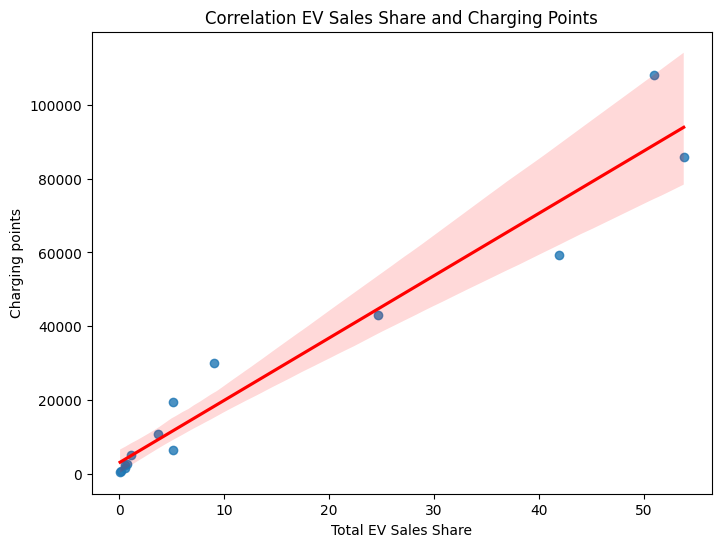

In [118]:
plt.figure(figsize=(8, 6))

# Creating scatter plot with regression line
sns.regplot(x='Total EV Sales Share', y='Charging_Points', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Sales Share and Charging Points')
plt.xlabel('Total EV Sales Share')
plt.ylabel('Charging points')

plt.show()

In [119]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_stock_all, total_ev_sales_share_all, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "Total EV Stock", "Total EV Sales Share"]
merged_df

,Year,Total EV Stock,Total EV Sales Share
0,2010,491.0,0.0919
1,2011,2399.0,0.1720
2,2012,6788.0,0.5400
3,2013,14314.0,0.5200
4,2014,28324.0,0.7700
5,2015,48986.0,1.1700
6,2016,72614.0,5.1100
7,2017,115524.0,3.7300
8,2018,182934.0,5.1400
9,2019,263068.0,9.0300


In [120]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['Total EV Stock', 'Total EV Sales Share']].cov().iloc[0, 1]
covariance

np.float64(16049657.062401287)

In [121]:
correlation, p_value = pearsonr(merged_df['Total EV Stock'], merged_df['Total EV Sales Share'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9641807180379196
P-value: 2.8224240274951906e-08


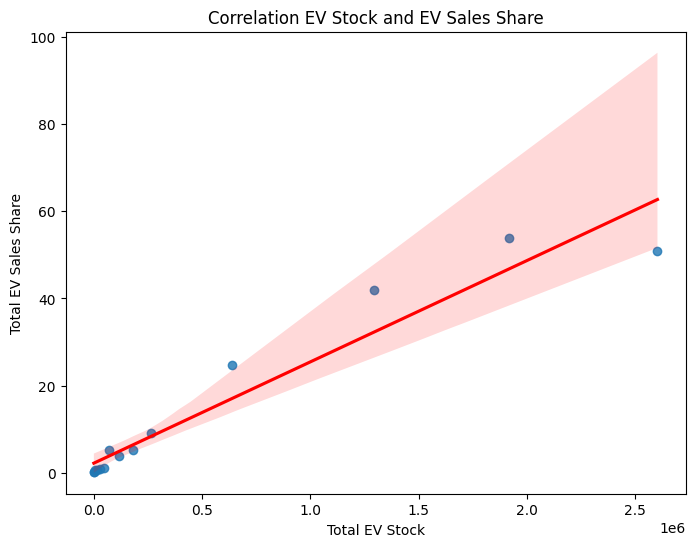

In [122]:
plt.figure(figsize=(8, 6))

# Creating scatter plot with regression line
sns.regplot(x='Total EV Stock', y='Total EV Sales Share', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation EV Stock and EV Sales Share')
plt.xlabel('Total EV Stock')
plt.ylabel('Total EV Sales Share')

plt.show()

In [123]:
# Merging the two dataframes on the 'Year' column
merged_df = pd.merge(total_ev_stock_share_all, total_ev_sales_share_all, on="Year", how="outer")

# Renaming columns for clarity
merged_df.columns = ["Year", "Total EV Stock Share", "Total EV Sales Share"]
merged_df

,Year,Total EV Stock Share,Total EV Sales Share
0,2010,0.01258,0.0919
1,2011,0.02840,0.1720
2,2012,0.07900,0.5400
3,2013,0.12100,0.5200
4,2014,0.17600,0.7700
5,2015,0.25700,1.1700
6,2016,0.68000,5.1100
7,2017,0.99000,3.7300
8,2018,1.34000,5.1400
9,2019,1.91000,9.0300


In [124]:
# Calculating the covariance between 'EV Sales' and 'Charging points'
covariance = merged_df[['Total EV Stock Share', 'Total EV Sales Share']].cov().iloc[0, 1]
covariance

np.float64(71.73521806235935)

In [125]:
correlation, p_value = pearsonr(merged_df['Total EV Stock Share'], merged_df['Total EV Sales Share'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.945836878622702
P-value: 3.241643851756997e-07


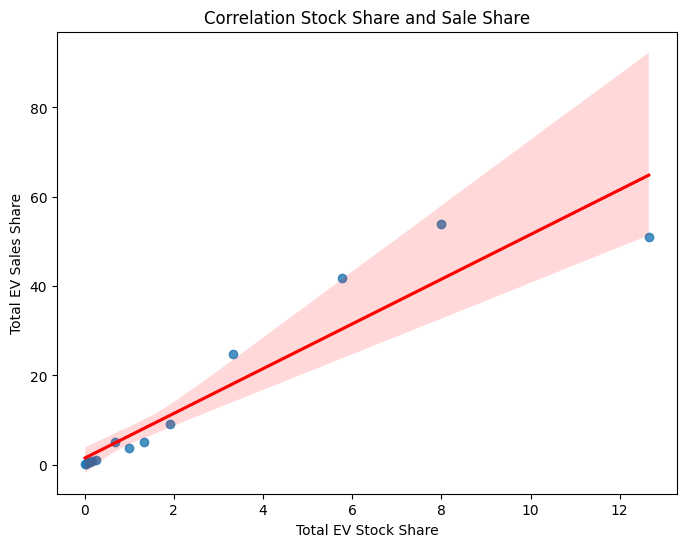

In [126]:
plt.figure(figsize=(8, 6))

# Creating scatter plot with regression line
sns.regplot(x='Total EV Stock Share', y='Total EV Sales Share', data=merged_df, line_kws={"color": "red"})

plt.title('Correlation Stock Share and Sale Share')
plt.xlabel('Total EV Stock Share')
plt.ylabel('Total EV Sales Share')

plt.show()

As you might have noticed, we didn't removed / or handled outliers, since we already have little data and most of the data was extracted manually and came from trustworthy sources. Furthermore, these observed outliers are plausible. What we do now is to combine the extracted data for each feature.

In [127]:
# List of DataFrames
dataframes = [total_ev_sales_all, charging_points_df, total_ev_stock_all, total_ev_stock_share_all, total_ev_sales_share_all, gdp_growth_df, disposable_income_df, inflation_rate_df, electricity_consumption_df, urbanization_rate_df, average_fuel_price_df, registrations_data_df, transport_emissions_2010_onwards]

In [128]:
# Start with the first DataFrame
combined_df = dataframes[0]

# Merge all DataFrames on 'Year'
for df in dataframes[1:]:
    combined_df = pd.merge(combined_df, df, on='Year', how='outer')

In [129]:
combined_df

,Year,Total EV Sales,Charging_Points,Total EV Stock,Total EV Stock Share,Total EV Sales Share,GDP Growth (%),Disposable Income (EUR bn),Inflation Rate (%),Electricity Consumption (TWh),Urbanization Rate (%),average_fuel_price,Registrations,Mt CO2
0,2010,328.0,NaN,491.0,0.01258,0.0919,4.18,2117.96,1.12,565.66,NaN,NaN,541,148.123
1,2011,1958.0,NaN,2399.0,0.02840,0.1720,3.39,2251.78,2.48,557.89,NaN,1.326575,2154,149.942
2,2012,4379.0,1518.0,6788.0,0.07900,0.5400,0.42,2280.52,2.16,556.13,NaN,1.388405,2956,148.513
3,2013,7425.0,2447.0,14314.0,0.12100,0.5200,0.44,2324.41,1.61,555.04,77.18,1.339675,6051,152.366
4,2014,14228.0,2726.0,28324.0,0.17600,0.7700,2.21,2425.05,0.77,542.61,77.19,1.306000,8522,154.573
5,2015,24065.0,5070.0,48986.0,0.25700,1.1700,1.49,2515.47,0.68,547.76,77.20,1.167244,12363,157.590
6,2016,26646.0,6430.0,72614.0,0.68000,5.1100,2.23,2616.92,0.37,550.61,77.22,1.090690,11410,161.024
7,2017,58619.0,10800.0,115524.0,0.99000,3.7300,2.68,2716.89,1.70,551.94,77.26,1.150660,25056,163.491
8,2018,73433.0,19500.0,182934.0,1.34000,5.1400,0.98,2822.64,1.94,541.74,77.31,1.226150,36062,157.660
9,2019,115710.0,29900.0,263068.0,1.91000,9.0300,1.08,2919.45,1.35,527.24,77.38,1.221925,63281,160.038


Values are missing for some years. We can easily google/research these values.

https://en.wikipedia.org/wiki/Plug-in_electric_vehicles_in_Germany

In [130]:
# Replacing NaN values for the 'Charging_Points' column for 2010 and 2011
combined_df.loc[combined_df["Year"] == 2010, "Charging_Points"] = 500
combined_df.loc[combined_df["Year"] == 2011, "Charging_Points"] = 700

Electricity Consumption: https://en.wikipedia.org/wiki/Energy_in_Germany#:~:text=Total%20consumption%20has%20been%20steadily,and%20631.4%20TWh%20in%202013

Urbanization Rate: https://www.indexmundi.com/facts/germany/indicator/SP.URB.TOTL.IN.ZS?utm

Fuel Prices: https://www.adac.de/verkehr/tanken-kraftstoff-antrieb/deutschland/kraftstoffpreisentwicklung/?utm

CO2 emissions by transport: https://www.umweltbundesamt.de/presse/pressemitteilungen/klimaemissionen-sinken-2023-um-101-prozent?utm_source=chatgpt.com

In [131]:
combined_df.loc[combined_df["Year"] == 2023, "Electricity Consumption (TWh)"] = 508.1
combined_df.loc[combined_df["Year"] == 2010, "Urbanization Rate (%)"] = 76.97
combined_df.loc[combined_df["Year"] == 2011, "Urbanization Rate (%)"] = 77.16
combined_df.loc[combined_df["Year"] == 2012, "Urbanization Rate (%)"] = 77.17
combined_df.loc[combined_df["Year"] == 2010, "average_fuel_price"] = 1.339
combined_df.loc[combined_df["Year"] == 2023, "Mt CO2"] = 146

In [132]:
combined_df

,Year,Total EV Sales,Charging_Points,Total EV Stock,Total EV Stock Share,Total EV Sales Share,GDP Growth (%),Disposable Income (EUR bn),Inflation Rate (%),Electricity Consumption (TWh),Urbanization Rate (%),average_fuel_price,Registrations,Mt CO2
0,2010,328.0,500.0,491.0,0.01258,0.0919,4.18,2117.96,1.12,565.66,76.97,1.339000,541,148.123
1,2011,1958.0,700.0,2399.0,0.02840,0.1720,3.39,2251.78,2.48,557.89,77.16,1.326575,2154,149.942
2,2012,4379.0,1518.0,6788.0,0.07900,0.5400,0.42,2280.52,2.16,556.13,77.17,1.388405,2956,148.513
3,2013,7425.0,2447.0,14314.0,0.12100,0.5200,0.44,2324.41,1.61,555.04,77.18,1.339675,6051,152.366
4,2014,14228.0,2726.0,28324.0,0.17600,0.7700,2.21,2425.05,0.77,542.61,77.19,1.306000,8522,154.573
5,2015,24065.0,5070.0,48986.0,0.25700,1.1700,1.49,2515.47,0.68,547.76,77.20,1.167244,12363,157.590
6,2016,26646.0,6430.0,72614.0,0.68000,5.1100,2.23,2616.92,0.37,550.61,77.22,1.090690,11410,161.024
7,2017,58619.0,10800.0,115524.0,0.99000,3.7300,2.68,2716.89,1.70,551.94,77.26,1.150660,25056,163.491
8,2018,73433.0,19500.0,182934.0,1.34000,5.1400,0.98,2822.64,1.94,541.74,77.31,1.226150,36062,157.660
9,2019,115710.0,29900.0,263068.0,1.91000,9.0300,1.08,2919.45,1.35,527.24,77.38,1.221925,63281,160.038


## Modeling

First, we want to look the correlations between each features to decide which types of models we want to apply.

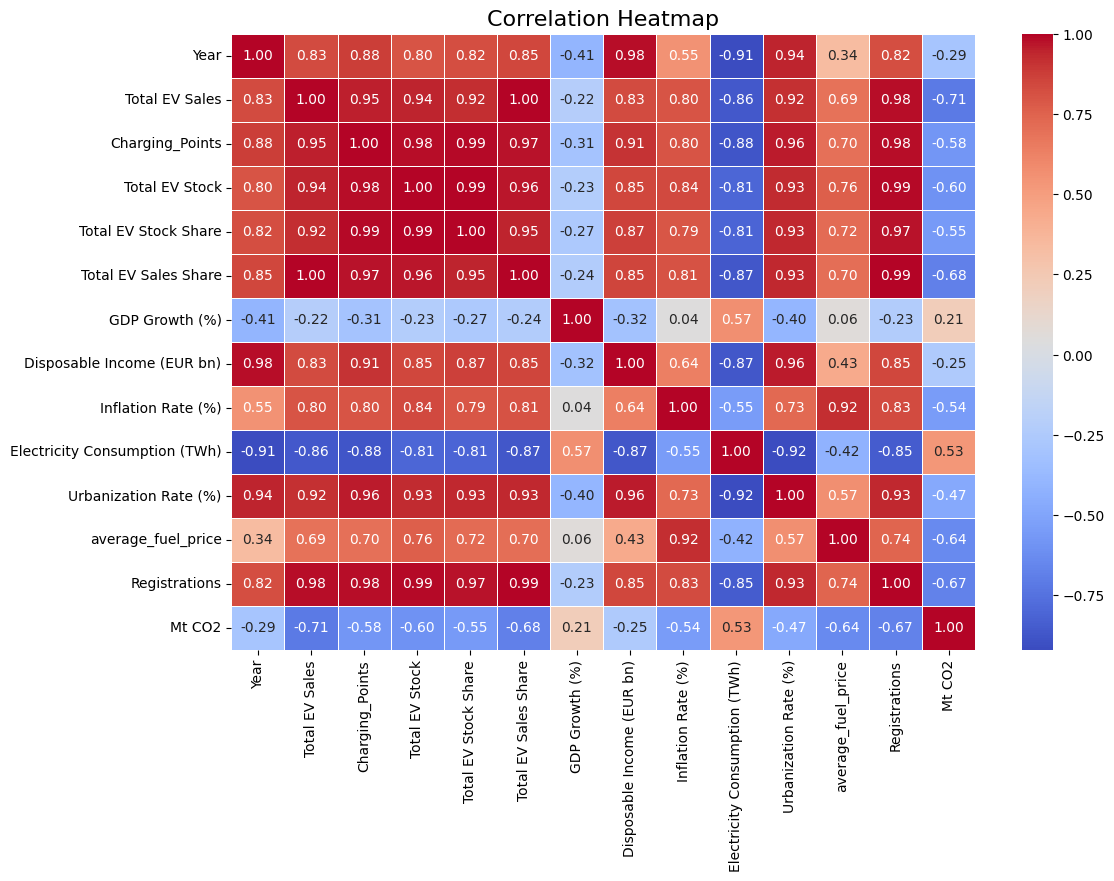

In [133]:
# Compute the correlation matrix
correlation_matrix = combined_df.corr()

# Create a heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Because target variable is continuous we can use regression models. Since we have approximately a linear relationship between the target variable (Total EV Sales) and the inpendent variables, we can apply Linear Regresssion. Decision Tree Regression was chosen for its ability to model complex, non-linear relationships between the features and the target variable. Unlike Linear Regression, it can capture interactions between variables and does not require assumptions about data distribution. Random Forest Regression was included as it builds on the strengths of Decision Trees while mitigating their limitations, such as overfitting.

### Linear Regression

In [134]:
# Dependent variable (Target)
y = combined_df['Total EV Sales']

# Independent variables (Features)
X = combined_df.drop(['Total EV Sales'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(262952610.6865553, 0.997242505906727)

In [135]:
# Initializing the Linear Regression model
linear_model = LinearRegression()

# Setting up k-fold cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Defining scoring metrics for cross-validation
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
scoring_r2 = make_scorer(r2_score)

# Performing k-fold cross-validation for MSE and R²
cv_mse_scores = cross_val_score(linear_model, X, y, cv=kfold, scoring=scoring_mse)
cv_r2_scores = cross_val_score(linear_model, X, y, cv=kfold, scoring=scoring_r2)

# Calculating the mean and standard deviation for each metric
mean_mse = -np.mean(cv_mse_scores)  # Convert back to positive MSE
mean_r2 = np.mean(cv_r2_scores)

mean_mse, mean_r2

(np.float64(611351971.2814525), np.float64(0.9862955690236112))

For the evaluation we look at the Mean Squared Error, R-Squared, k-fold cross validation (we choose 3 here for k because we don't have so much data) and the residuals. An R² value of 0.997 indicates that 99.7% of the variability in EV sales is explained by the model. To further enhance the model, we can scale some of the features. We want to scale just some of the features because there might be features which explains the the target variable better (or has a much higher correlation). This was kind of a trial and error process to include or exclude the features to scale.

In [136]:
# Dependent variable (Target)
y = combined_df['Total EV Sales']

# Independent variables (Features)
X = combined_df.drop(['Total EV Sales'], axis=1)

# Defining features to scale and those to leave unscaled
features_to_scale = [col for col in X.columns if col != 'Year' and col != 'Total EV Stock' and col != 'Registrations']
features_to_leave = ['Year', 'Total EV Stock', 'Registrations']

# Creating the ColumnTransformer for selective scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), features_to_scale),
        ('passthrough', 'passthrough', features_to_leave)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying the preprocessing pipeline to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initializing and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_preprocessed, y_train)

# Making predictions on the test set
y_pred = linear_model.predict(X_test_preprocessed)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 171337102.2297285
R^2 Score: 0.9987030438716439


We can see that both the Mean Squared Error and R-Squared have improved.

In [137]:
# Defining features to scale and those to leave unscaled
features_to_scale = [col for col in X.columns if col != 'Year' and col != 'Total EV Stock' and col != 'Registrations']
features_to_leave = ['Year', 'Total EV Stock', 'Registrations']

# Creating the ColumnTransformer for selective scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), features_to_scale),
        ('passthrough', 'passthrough', features_to_leave)
    ]
)

# Defining the linear regression model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Setting up k-fold cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Defining scoring metrics for cross-validation
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
scoring_r2 = make_scorer(r2_score)

# Performing k-fold cross-validation for MSE and R²
cv_mse_scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_mse)
cv_r2_scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_r2)

# Calculating the mean
mean_mse = -np.mean(cv_mse_scores)
mean_r2 = np.mean(cv_r2_scores)

print("Mean MSE across folds:", mean_mse)
print("Mean R^2 across folds:", mean_r2)

Mean MSE across folds: 534436781.87539196
Mean R^2 across folds: 0.991822745950571


We can see the values are still at a good level.

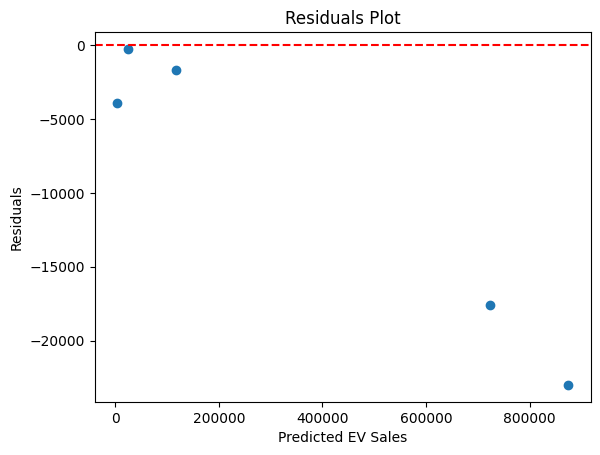

In [138]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted EV Sales')
plt.ylabel('Residuals')
plt.show()

This graph shows the distribution of the residuals. Residuals should appear randomly distributed around zero. Randomness indicates that the model captures the relationship well. We can also compute it, whethere there is random distribution with the help of "durbin watson" function. If the statistic is close to 2, it confirms that the residuals are randomly distributed.

In [139]:
# Performing Durbin-Watson test
dw_stat_linear = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat_linear)

Durbin-Watson Statistic: 1.5426147172389395


### Decision Tree Regression

In [140]:
# Separate the dependent (target) and independent (features) variables
y = combined_df['Total EV Sales']
X = combined_df.drop(['Total EV Sales'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Training the model on the training data
decision_tree_model.fit(X_train, y_train)

# Makeing predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluating the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_tree, r2_tree

(31595851218.0, 0.6686651146832681)

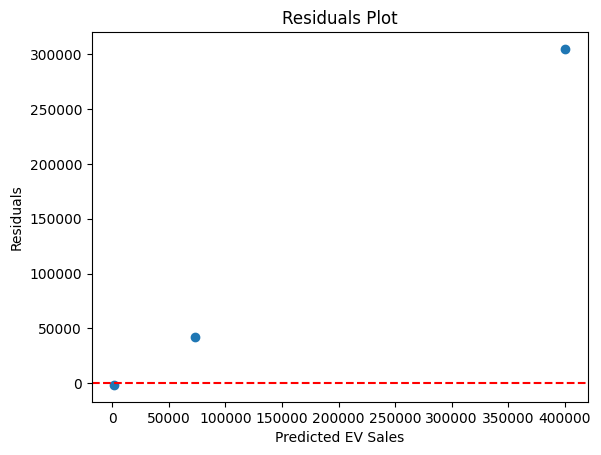

In [141]:
y_pred = decision_tree_model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted EV Sales')
plt.ylabel('Residuals')
plt.show()

In [142]:
# Performing Durbin-Watson test
dw_stat_tree = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat_tree)

Durbin-Watson Statistic: 1.719572745847753


In [143]:
# Initializing the Linear Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Setting up k-fold cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Defining scoring metrics for cross-validation
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)  # Negative MSE for compatibility
scoring_r2 = make_scorer(r2_score)

# Performing k-fold cross-validation for MSE and R²
cv_mse_scores = cross_val_score(decision_tree_model, X, y, cv=kfold, scoring=scoring_mse)
cv_r2_scores = cross_val_score(decision_tree_model, X, y, cv=kfold, scoring=scoring_r2)

# Calculating the mean and standard deviation for each metric
mean_mse_tree = -np.mean(cv_mse_scores)  # Convert back to positive MSE
mean_r2_tree = np.mean(cv_r2_scores)

mean_mse_tree, mean_r2_tree

(np.float64(20461578313.5), np.float64(0.46765507879400636))

### Random Forest Regression

In [144]:
# Separating the dependent (target) and independent (features) variables
y = combined_df['Total EV Sales']
X = combined_df.drop(['Total EV Sales'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Training the model on the training data
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_forest = random_forest_model.predict(X_test)

# Evaluating the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

mse_forest, r2_forest

(10514095847.952747, 0.8897422728713853)

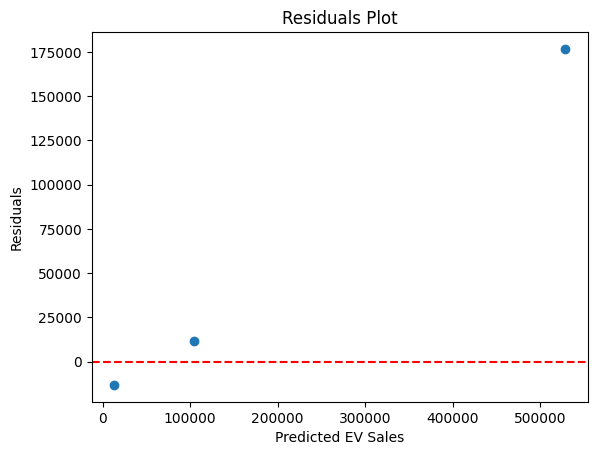

In [145]:
y_pred = random_forest_model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted EV Sales')
plt.ylabel('Residuals')
plt.show()

In [146]:
# Performing Durbin-Watson test
dw_stat_forest = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat_forest)

Durbin-Watson Statistic: 2.008548200051049


In [147]:
# Defining hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 40],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': ['sqrt', 'log2', None]
}

# Initializing Random Forest and GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [148]:
# Making predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Optimized Random Forest Results:")
print("Mean Squared Error (MSE):", mse_rf)
print("R² Score:", r2_rf)

Optimized Random Forest Results:
Mean Squared Error (MSE): 10514095847.952747
R² Score: 0.8897422728713853


In [149]:
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=200)

# Setting up k-fold cross-validation
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Defining scoring metrics for cross-validation
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
scoring_r2 = make_scorer(r2_score)

# Performing k-fold cross-validation for MSE and R²
cv_mse_scores = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scoring_mse)
cv_r2_scores = cross_val_score(random_forest_model, X, y, cv=kfold, scoring=scoring_r2)

# Calculating the mean and standard deviation for each metric
mean_mse_forest = -np.mean(cv_mse_scores)
mean_r2_forest = np.mean(cv_r2_scores)

mean_mse_forest, mean_r2_forest

(np.float64(16698437038.410646), np.float64(0.81569830531651))

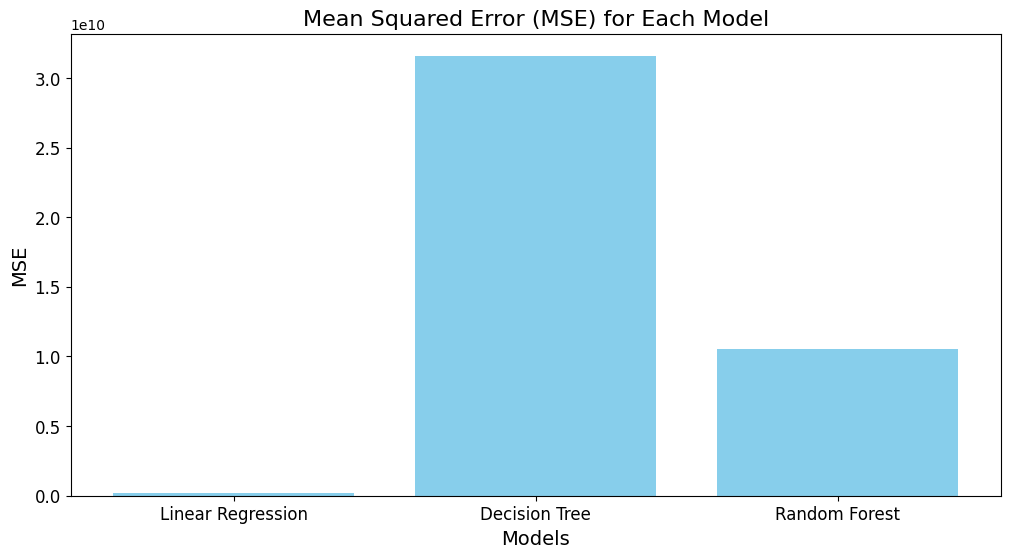

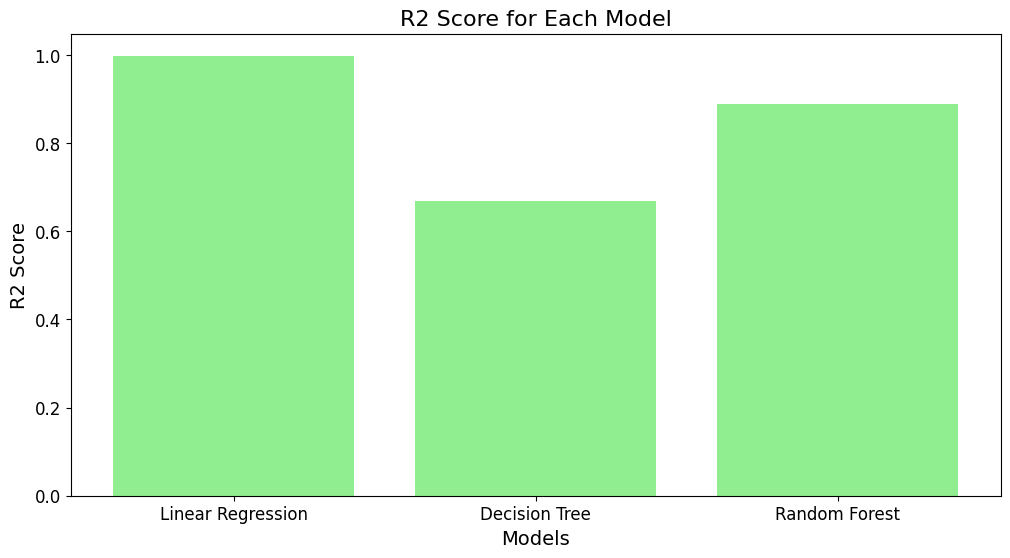

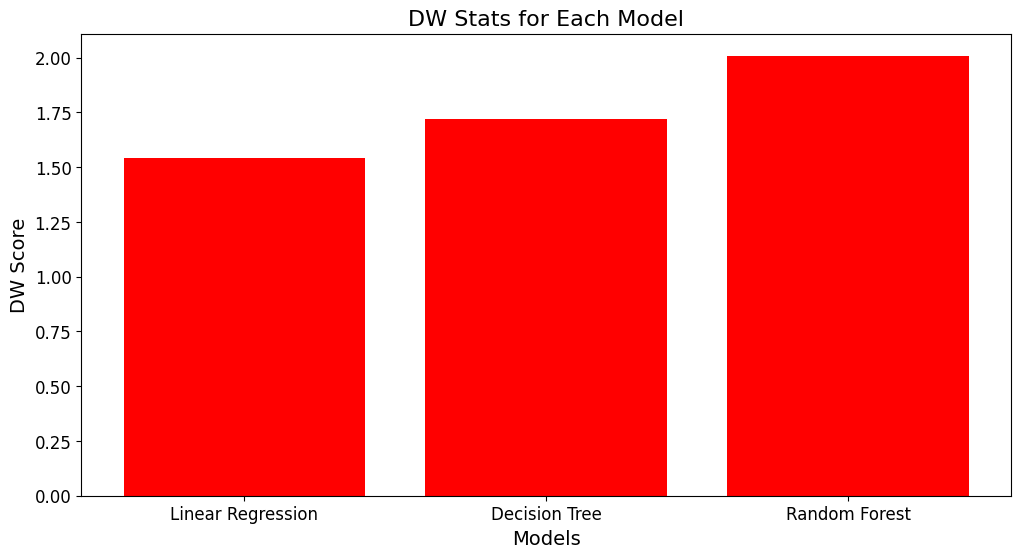

In [150]:
# Define the models and their evaluation metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse, mse_tree, mse_forest]
r2_values = [r2, r2_tree, r2_forest]
dw_stats = [dw_stat_linear, dw_stat_tree, dw_stat_forest]

# Plot MSE for each model
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) for Each Model', fontsize=16)
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot R2 Score for each model
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color='lightgreen')
plt.title('R2 Score for Each Model', fontsize=16)
plt.ylabel('R2 Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot DW Stat for each model
plt.figure(figsize=(12, 6))
plt.bar(models, dw_stats, color='red')
plt.title('DW Stats for Each Model', fontsize=16)
plt.ylabel('DW Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

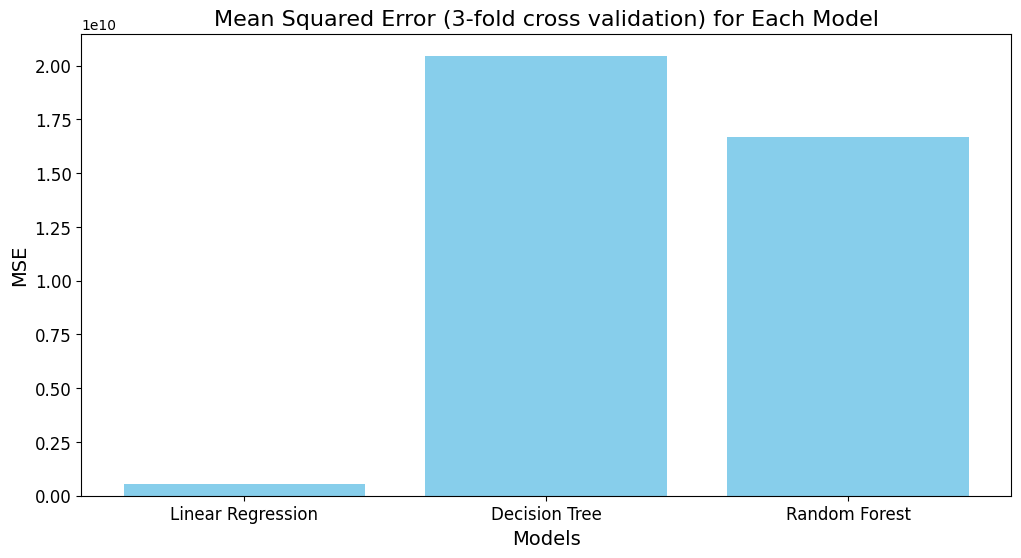

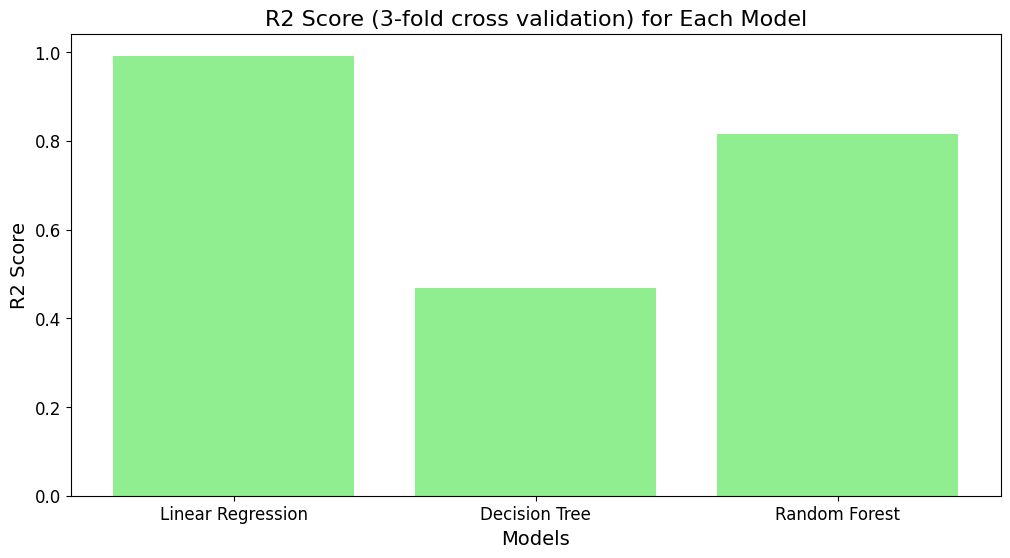

In [151]:
# Defining the models and their evaluation metrics
mse, r2, mean_mse, mean_r2, mse_tree, r2_tree, mse_forest, r2_forest, mean_mse_forest, mean_r2_forest
mean_mse_tree, mean_r2_tree
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mean_mse, mean_mse_tree, mean_mse_forest]
r2_values = [mean_r2, mean_r2_tree, mean_r2_forest]

# Plotting MSE for each model
plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (3-fold cross validation) for Each Model', fontsize=16)
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plotting R2 Score for each model
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color='lightgreen')
plt.title('R2 Score (3-fold cross validation) for Each Model', fontsize=16)
plt.ylabel('R2 Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

All in all, we can say that "Linear Regression" performs the best. Linear Regression assumes a linear relationship between the independent variables and the target variable. Out data inherently has a strong linear structure, that's why Linear Regression performs better as it aligns with the data's true underlying patterns. Decision Tree and Random Forest models are more flexible and can model non-linear relationships, but this flexibility might lead to slight inefficiencies when the data fits a linear trend well. The models may unnecessarily partition the data, leading to a higher error.

The high R² score and low(er) MSE demonstrate that the Linear Regression model effectively leverages the relationships between the features and the target variable (EV sales). This is particularly promising for understanding and forecasting future market trends in EV adoption. it is crucial to acknowledge a key limitation: the model was trained and tested on a small dataset. Small sample sizes can lead to overfitting or insufficient representation of the variability in real-world data. This may reduce the model’s generalizability and accuracy when applied to larger or more diverse datasets. So, it would be better to incorporate more historical data (which was not available) and include a wider range of samples to better capture the diversity and complexity of factors influencing EV sales.

In [152]:
# Defineing models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=200)

# Initializing cross-validation
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Initializing variables to store performance metrics
linear_mse_scores = []
forest_mse_scores = []
performance_differences = []

# Performing 5x2 CV
for i in range(5):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Preprocessing the data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_test_preprocessed = preprocessor.transform(X_test)

        # Training Linear Regression model
        linear_model.fit(X_train_preprocessed, y_train)
        y_pred_linear = linear_model.predict(X_test_preprocessed)
        mse_linear = mean_squared_error(y_test, y_pred_linear)
        linear_mse_scores.append(mse_linear)

        # Training Random Forest model
        random_forest_model.fit(X_train, y_train)
        y_pred_forest = random_forest_model.predict(X_test)
        mse_forest = mean_squared_error(y_test, y_pred_forest)
        forest_mse_scores.append(mse_forest)

        # Storing performance difference
        performance_differences.append(mse_linear - mse_forest)

# Performing paired t-test
t_stat, p_value = ttest_rel(linear_mse_scores, forest_mse_scores)

print("Linear Regression MSE Scores:", linear_mse_scores)
print("Random Forest MSE Scores:", forest_mse_scores)
print("Performance Differences:", performance_differences)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpreting the results
if p_value < 0.05:
    print("The performance differences between the models are statistically significant.")
else:
    print("The performance differences between the models are not statistically significant.")

Linear Regression MSE Scores: [208475132.98337063, 1260313143.9993694, 208475132.98337063, 1260313143.9993694, 208475132.98337063, 1260313143.9993694, 208475132.98337063, 1260313143.9993694, 208475132.98337063, 1260313143.9993694]
Random Forest MSE Scores: [29290293217.185123, 4105382856.978047, 29290293217.185123, 4105382856.978047, 29290293217.185123, 4105382856.978047, 29290293217.185123, 4105382856.978047, 29290293217.185123, 4105382856.978047]
Performance Differences: [-29081818084.20175, -2845069712.9786777, -29081818084.20175, -2845069712.9786777, -29081818084.20175, -2845069712.9786777, -29081818084.20175, -2845069712.9786777, -29081818084.20175, -2845069712.9786777]
T-Statistic: -3.6506301023413097
P-Value: 0.005312320550487982
The performance differences between the models are statistically significant.


Since we now also now that there is statistical difference between the the best perfoming linear regression model and second best performing random forest regression model, we can choose the linear regression model to for the predictions.

## Hypothesis tests

$H_0$: There is no significant relationship between average fuel prices and the number of EV sales.

$H_a$: The increase in average fuel prices results in an increase of EV sales.

$H_0$: There is no significant relationship between CO2 emissions by transport and the number of EV sales.

$H_a$: The decrease in CO2 emissions by transport is associated with the increase of EV sales.

In [153]:
# Dependent variable (Target)
y = combined_df['Total EV Sales']

# Independent variables (Features)
X = combined_df.drop(['Total EV Sales'], axis=1)

# Defining features to scale and those to leave unscaled
features_to_scale = [col for col in X.columns if col != 'Year' and col != 'Total EV Stock' and col != 'Registrations']
features_to_leave = ['Year', 'Total EV Stock', 'Registrations']

# Creating the ColumnTransformer for selective scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), features_to_scale),
        ('passthrough', 'passthrough', features_to_leave)
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying the preprocessing pipeline to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Initializing and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_preprocessed, y_train)

# Making predictions on the test set
y_pred = linear_model.predict(X_test_preprocessed)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 171337102.2297285
R^2 Score: 0.9987030438716439


In [154]:
# Defining simulation parameters
future_years = [2024, 2025, 2026, 2027, 2028, 2029, 2030]
increment_rate = 0.05  # 5% annual increase in average fuel price

# Using the last row of X as the base for simulation
base_row = X.iloc[-2].copy()
future_data = []

for year in future_years:
    new_row = base_row.copy()
    new_row['average_fuel_price'] *= (1 + increment_rate)
    new_row['Year'] = year
    future_data.append(new_row)
    base_row = new_row

# Creating a DataFrame for future projections
future_df = pd.DataFrame(future_data)

# Displaying the simulated DataFrame
future_df

,Year,Charging_Points,Total EV Stock,Total EV Stock Share,Total EV Sales Share,GDP Growth (%),Disposable Income (EUR bn),Inflation Rate (%),Electricity Consumption (TWh),Urbanization Rate (%),average_fuel_price,Registrations,Mt CO2
12,2024.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.841296,470559.0,140.957
12,2025.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.933361,470559.0,140.957
12,2026.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,2.030029,470559.0,140.957
12,2027.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,2.131530,470559.0,140.957
12,2028.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,2.238106,470559.0,140.957
12,2029.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,2.350012,470559.0,140.957
12,2030.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,2.467512,470559.0,140.957


In [155]:
# Applying preprocessing to the simulated data
future_df_preprocessed = preprocessor.transform(future_df)

In [156]:
# Predicting EV sales for future data
future_sales_predictions = linear_model.predict(future_df_preprocessed)
future_df['Predicted EV Sales'] = future_sales_predictions

print(future_df[['Year', 'Predicted EV Sales']])

      Year  Predicted EV Sales
12  2024.0       881693.694682
12  2025.0       884855.337636
12  2026.0       887969.720760
12  2027.0       891034.481063
12  2028.0       894047.137404
12  2029.0       897005.084585
12  2030.0       899905.587147


In [157]:
correlation, p_value = pearsonr(future_df['Predicted EV Sales'], future_df['average_fuel_price'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9983704136310534
P-value: 2.0571599319443473e-07


We can see that we have a high correlation between "average fuel price" and the predicted EV sales. The high correlation between average fuel prices and the predicted EV sales, combined with a p-value of less than 0.05, provides strong statistical evidence supporting the relationship. A p-value below 0.05 indicates that the likelihood of observing this correlation by random chance is very low (less than 5%), allowing us to reject the null hypothesis that there is no relationship between average fuel prices and EV sales. This statistically significant result suggests that as average fuel prices increase, EV sales are likely to rise as well. The reasoning behind this could be that higher fuel prices make internal combustion engine vehicles more expensive to operate, thereby encouraging consumers to switch to electric vehicles.

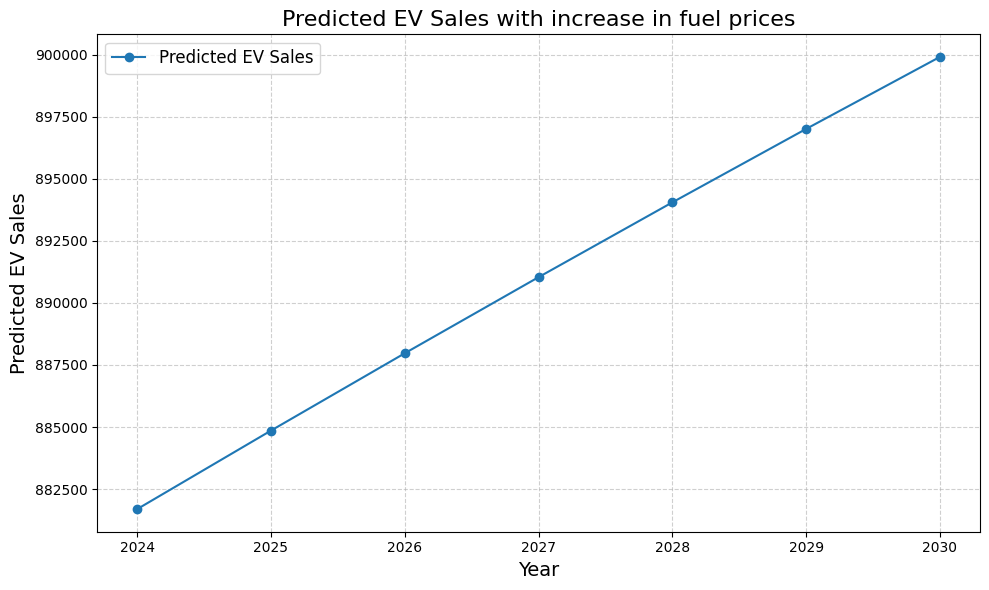

In [158]:
# Ensuring 'Year' is in integer format for better readability
future_df['Year'] = future_df['Year'].astype(int)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(future_df['Year'], future_df['Predicted EV Sales'], marker='o', linestyle='-', label="Predicted EV Sales")

# Adding labels, title, and legend
plt.title("Predicted EV Sales with increase in fuel prices", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Predicted EV Sales", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(future_df['Year'])
plt.tight_layout()

plt.show()

In [159]:
# Defining simulation parameters
future_years = [2024, 2025, 2026, 2027, 2028, 2029, 2030]
increment_rate = 0.05  # 5% annual increase in average fuel price

# Using the last row of X as the base for simulation
base_row = X.iloc[-2].copy()
future_data = []

for year in future_years:
    new_row = base_row.copy()
    new_row['Mt CO2'] *= (1 - increment_rate)
    new_row['Year'] = year
    future_data.append(new_row)
    base_row = new_row

# Creating a DataFrame for future projections
future_df = pd.DataFrame(future_data)

# Displaying the simulated DataFrame
future_df

,Year,Charging_Points,Total EV Stock,Total EV Stock Share,Total EV Sales Share,GDP Growth (%),Disposable Income (EUR bn),Inflation Rate (%),Electricity Consumption (TWh),Urbanization Rate (%),average_fuel_price,Registrations,Mt CO2
12,2024.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.753615,470559.0,133.909150
12,2025.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.753615,470559.0,127.213692
12,2026.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.753615,470559.0,120.853008
12,2027.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.753615,470559.0,114.810357
12,2028.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.753615,470559.0,109.069840
12,2029.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.753615,470559.0,103.616348
12,2030.0,86000.0,1918684.0,7.995,53.8,1.81,3182.85,8.67,507.25,77.65,1.753615,470559.0,98.435530


In [160]:
# Applying preprocessing to the simulated data
future_df_preprocessed = preprocessor.transform(future_df)

In [161]:
# Predicting EV sales for future data
future_sales_predictions = linear_model.predict(future_df_preprocessed)
future_df['Predicted EV Sales'] = future_sales_predictions

print(future_df[['Year', 'Predicted EV Sales']])

      Year  Predicted EV Sales
12  2024.0       893763.490320
12  2025.0       908481.457853
12  2026.0       922668.868987
12  2027.0       936352.251542
12  2028.0       949556.806946
12  2029.0       962306.476557
12  2030.0       974624.004665


In [162]:
correlation, p_value = pearsonr(future_df['Predicted EV Sales'], future_df['Mt CO2'])

print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.9999086389982408
P-value: 1.5322679446052554e-10


The high significant negative correlation between CO2 emissions by transport and the number of EV sales suggests that as CO2 emissions decrease, the number of EV sales increases. This relationship is statistically significant, meaning it is unlikely to have occurred by random chance, and it indicates a meaningful connection between the two variables. So, in a real world scenario where we want to predict the number of EV sales, it wouldn't make sense to know the CO2 emissions first because the it is more likely that the number of EV sales influence the CO2 emissions by transport than vice versa. So, these calculations were basically a simulation to get the know whether there is a high negative correlation between these two variables so that we can say "the increase of number of EV sales causes a decrease in the C02 emissions by transport".

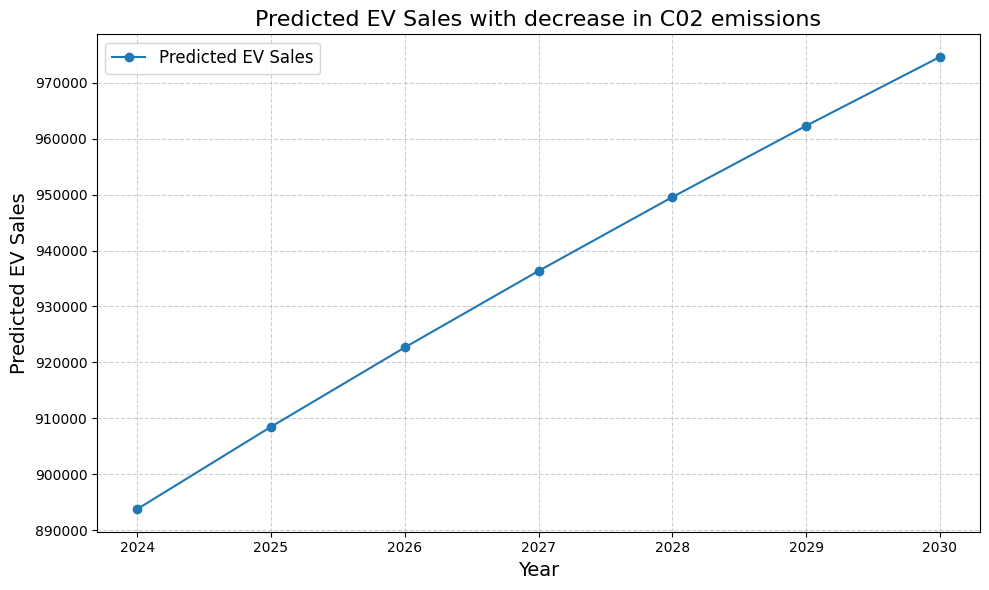

In [163]:
# Ensuring 'Year' is in integer format for better readability
future_df['Year'] = future_df['Year'].astype(int)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(future_df['Year'], future_df['Predicted EV Sales'], marker='o', linestyle='-', label="Predicted EV Sales")

# Adding labels, title, and legend
plt.title("Predicted EV Sales with decrease in C02 emissions", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Predicted EV Sales", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(future_df['Year'])
plt.tight_layout()

plt.show()